# Description

File used: [bank_additional_full](./Data/bank-additional/bank-additional/bank-additional-full_1.1.csv) <br>
Information about data in file: [info](./Data/bank-additional/bank-additional/bank-additional-names.txt)

# Loading Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer#, Imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from types import SimpleNamespace
from imblearn.under_sampling import ClusterCentroids 
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

dataFilePath = './Data/bank-additional/bank-additional/bank-additional-full_1.1.csv'
originalDataset = pd.read_csv(dataFilePath)
originalDataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


# Data Statistics

In [6]:
originalDataset.shape

(41188, 21)

In [7]:
originalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
originalDataset.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.019010,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.178074,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4964.000000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.000000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.000000,NaN


In [9]:
originalSetWithoutDups = originalDataset.drop_duplicates()
originalSetWithoutDups.shape

(41176, 21)

In [10]:
originalSetWithoutDups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [11]:
originalSetWithoutDups.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.017972,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.177913,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4964.000000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.000000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.000000,NaN


## Information about columns

In [12]:
originalSetWithoutDups.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


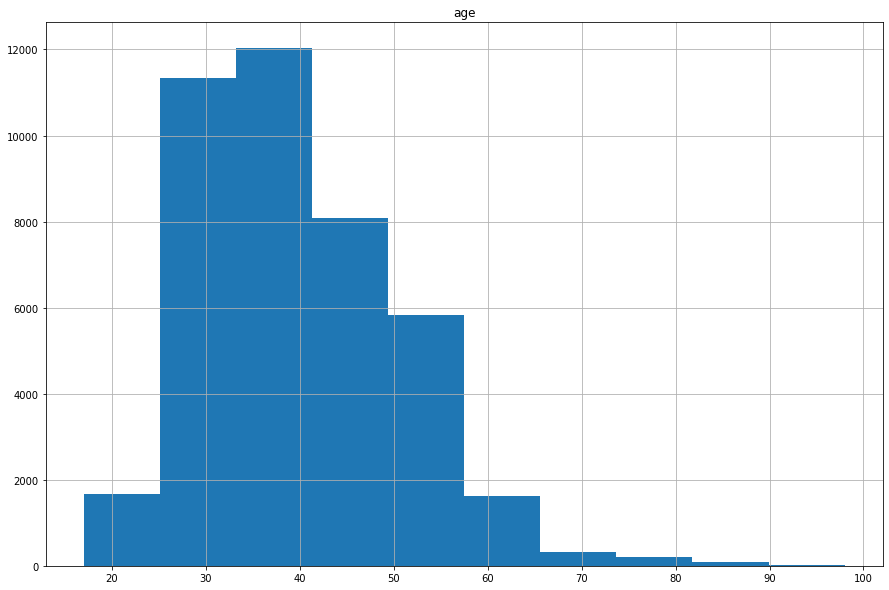

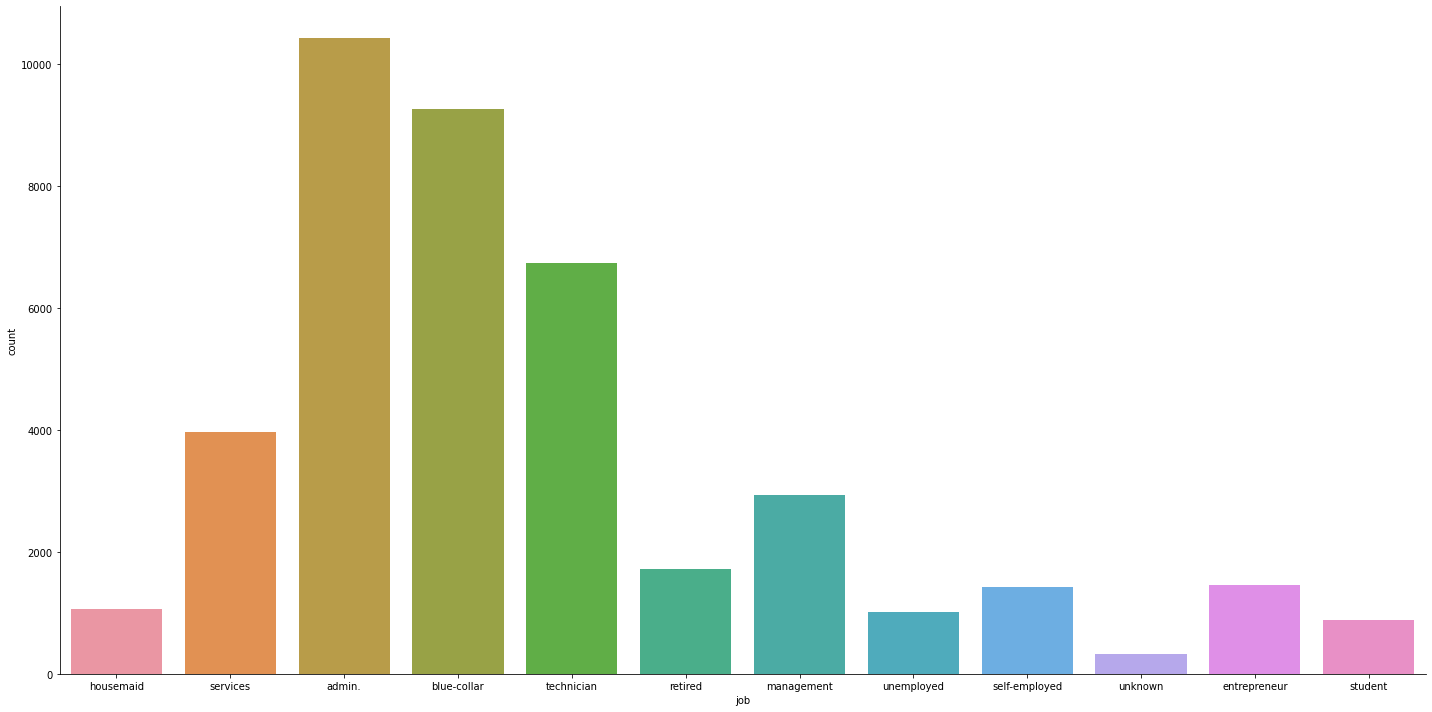

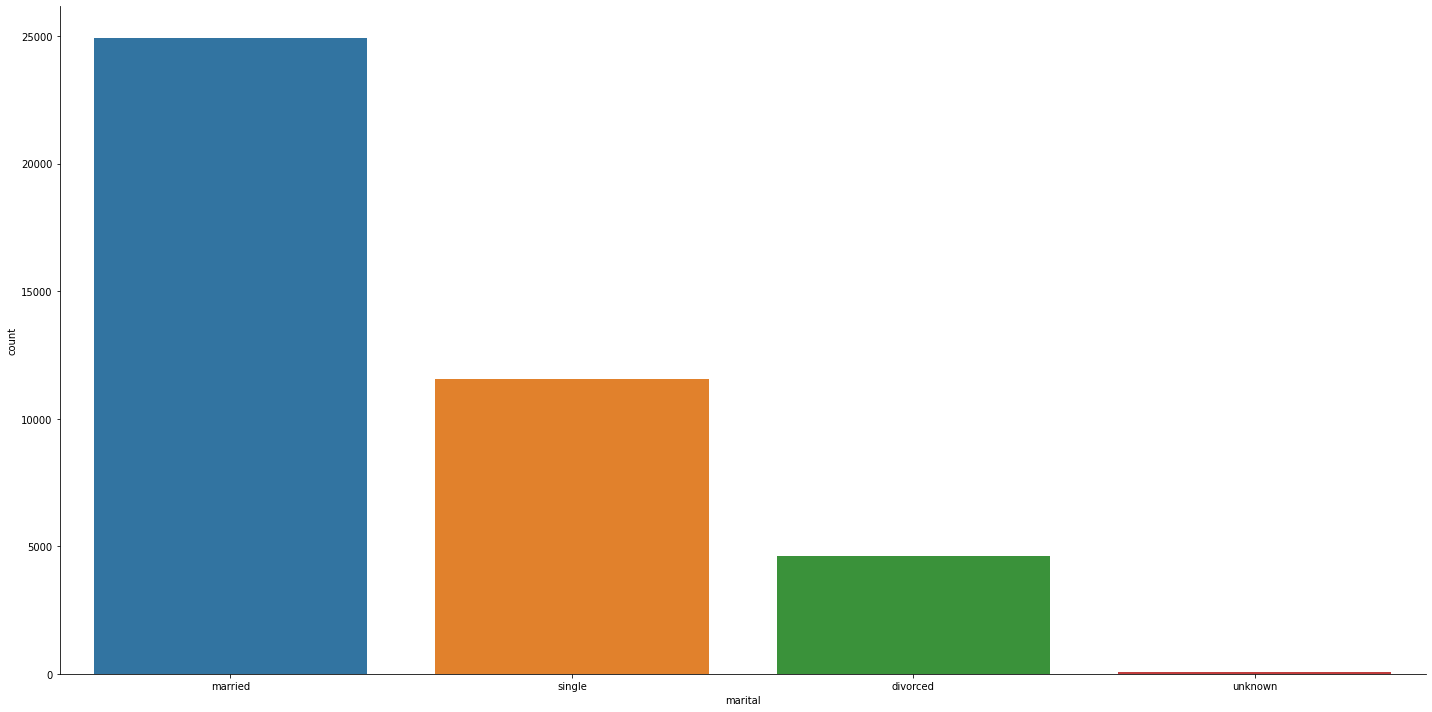

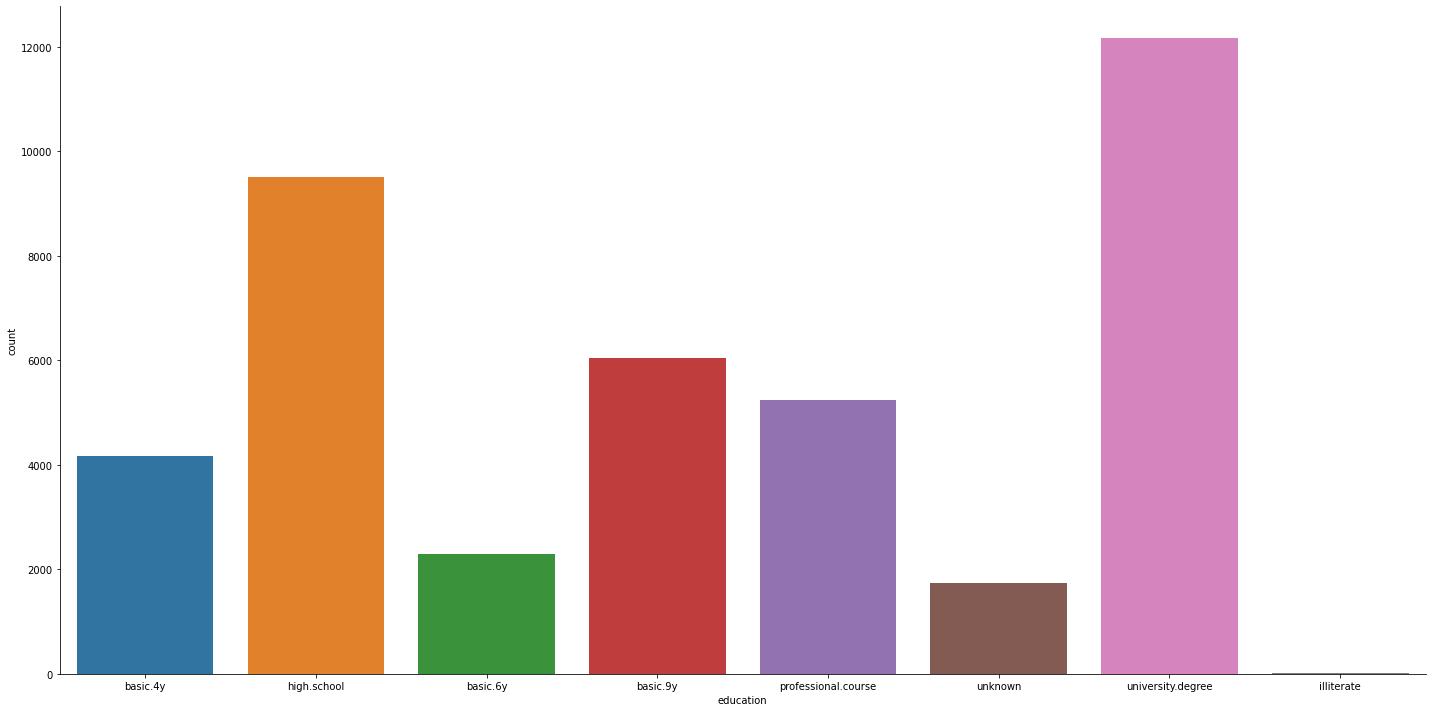

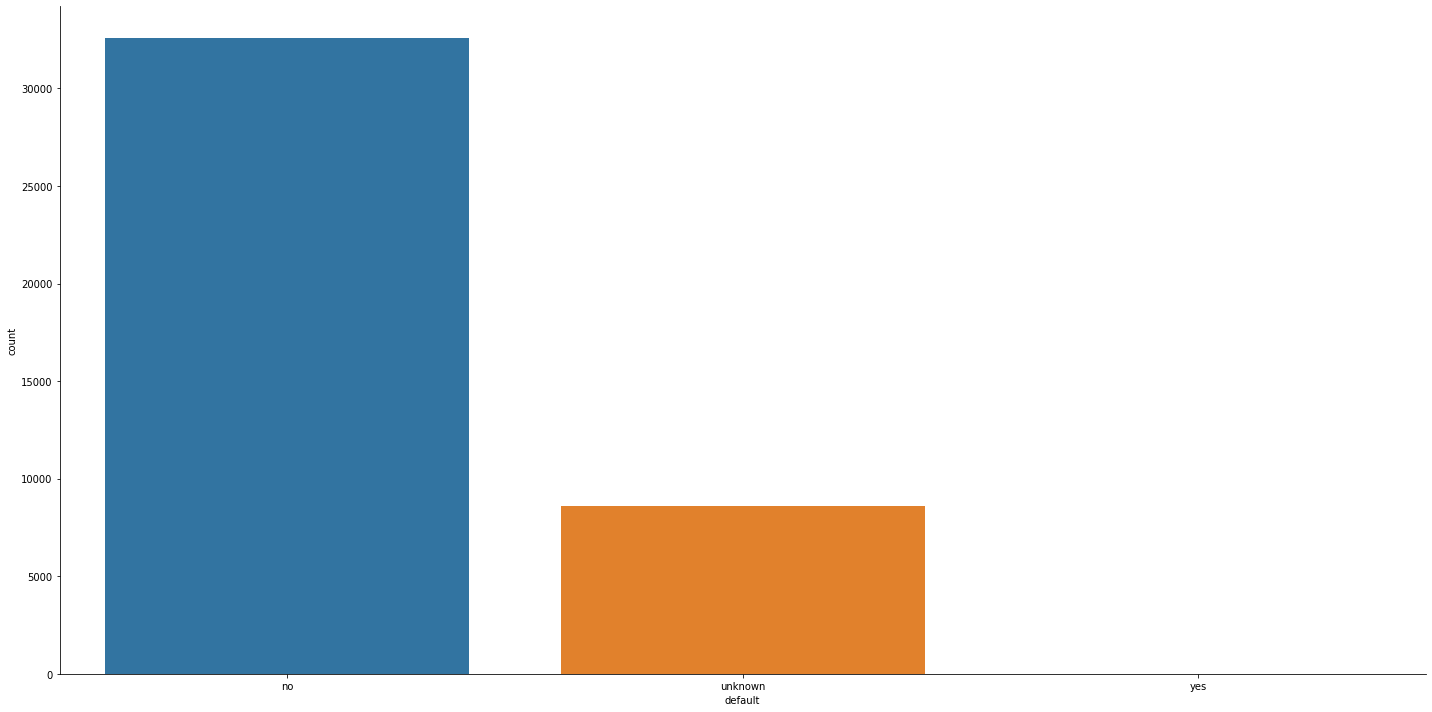

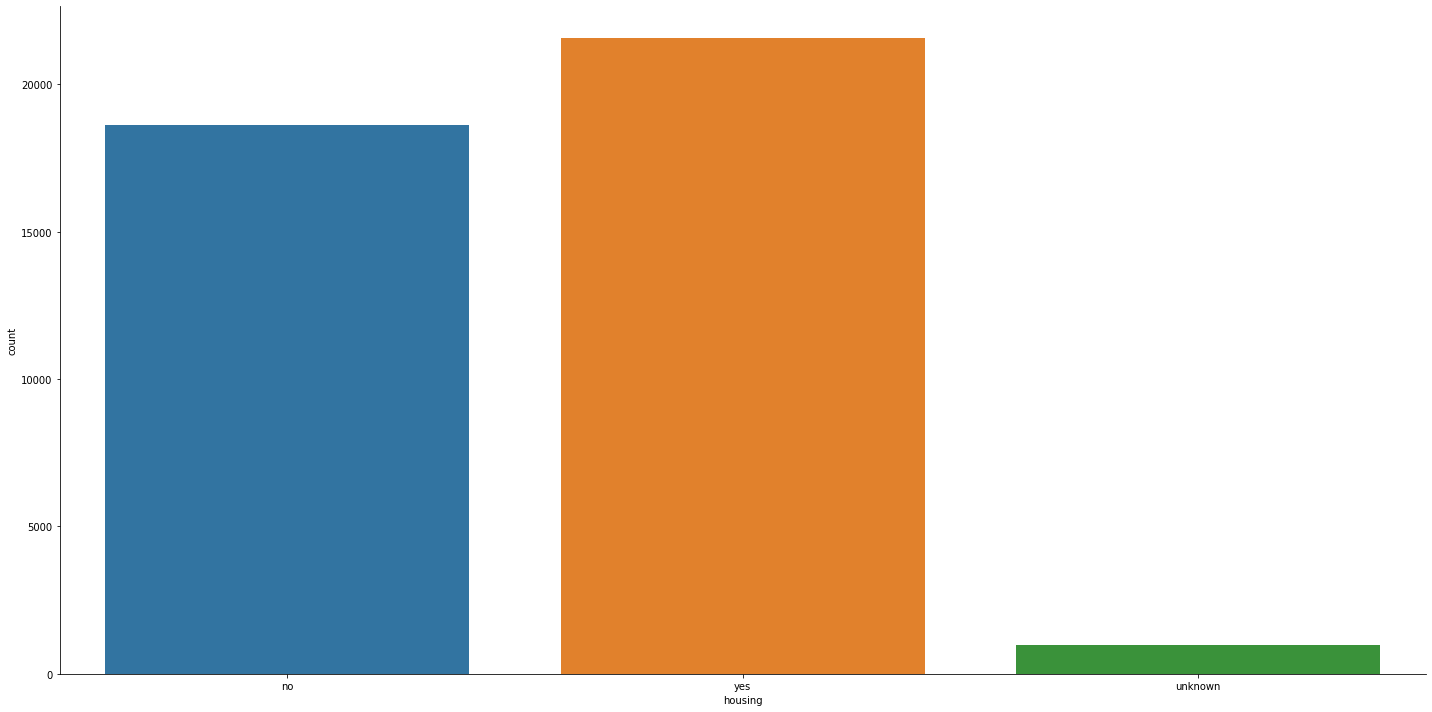

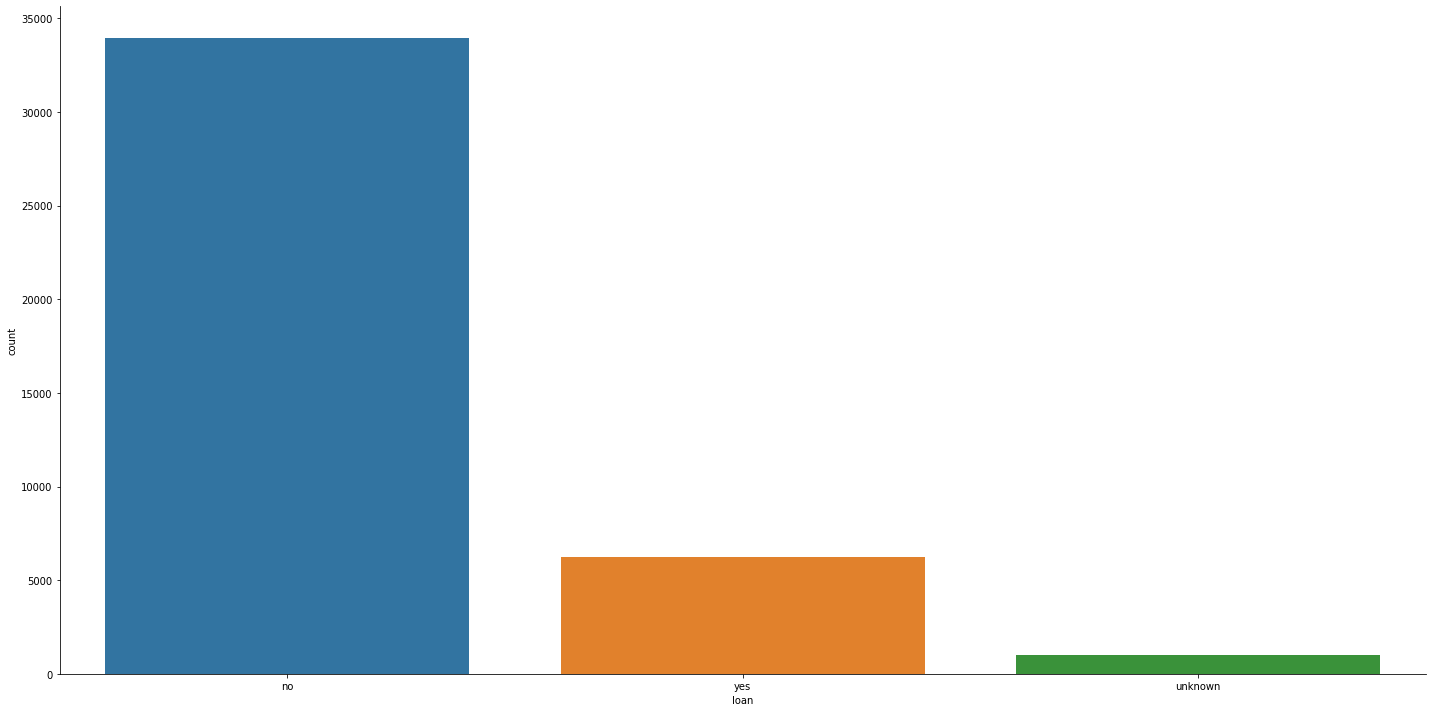

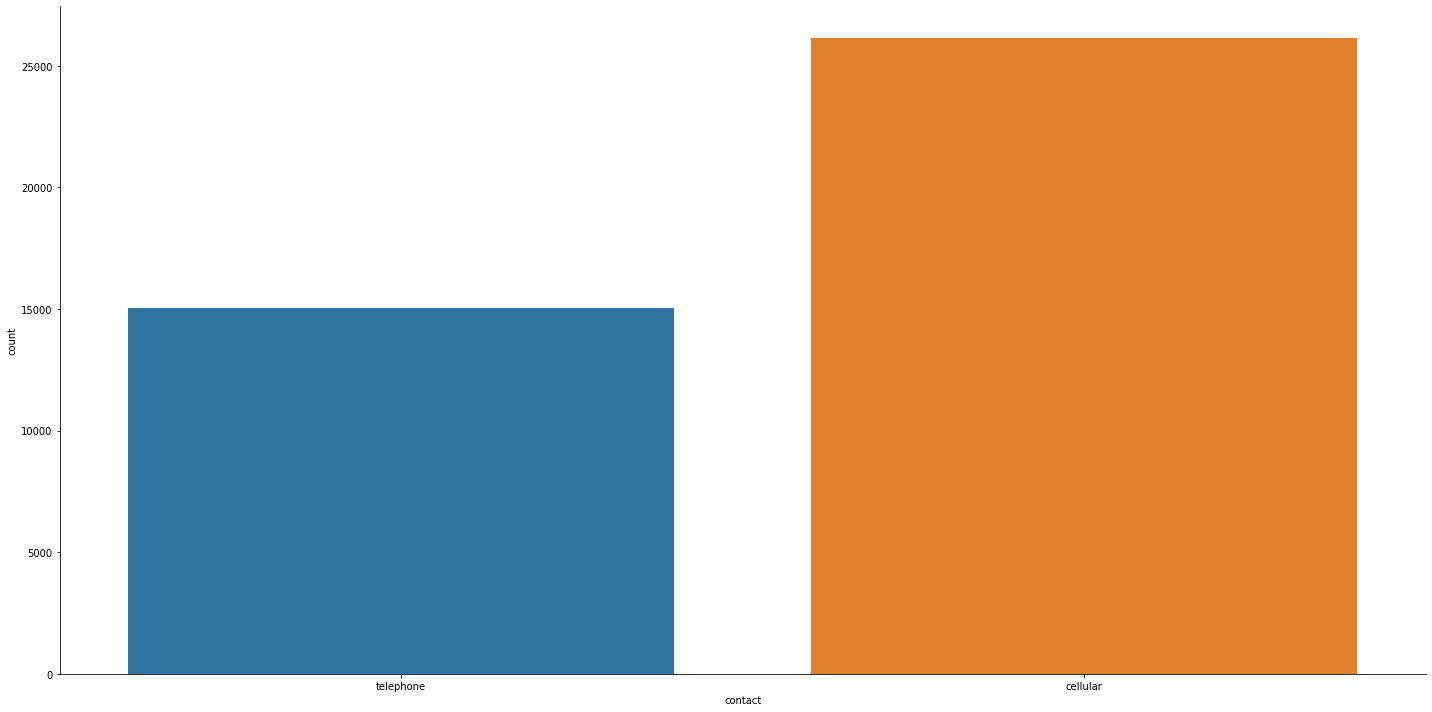

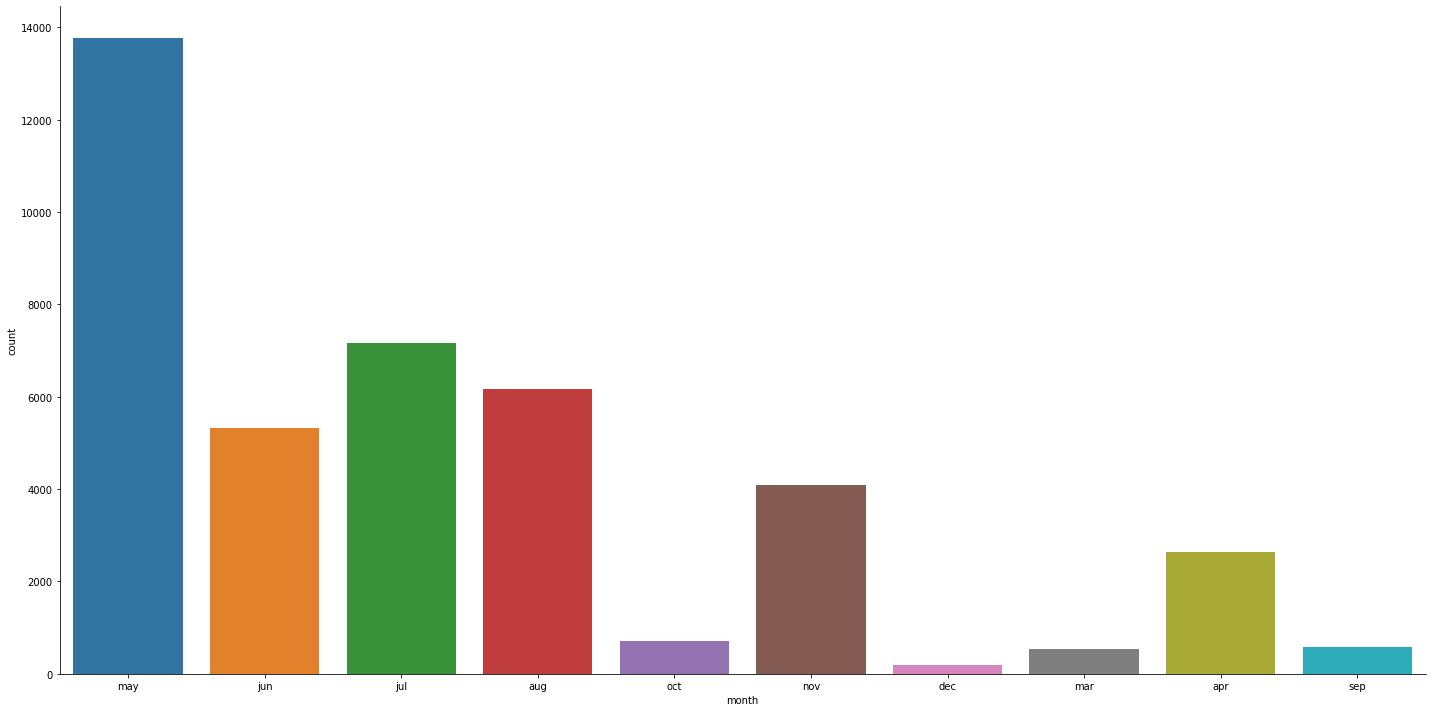

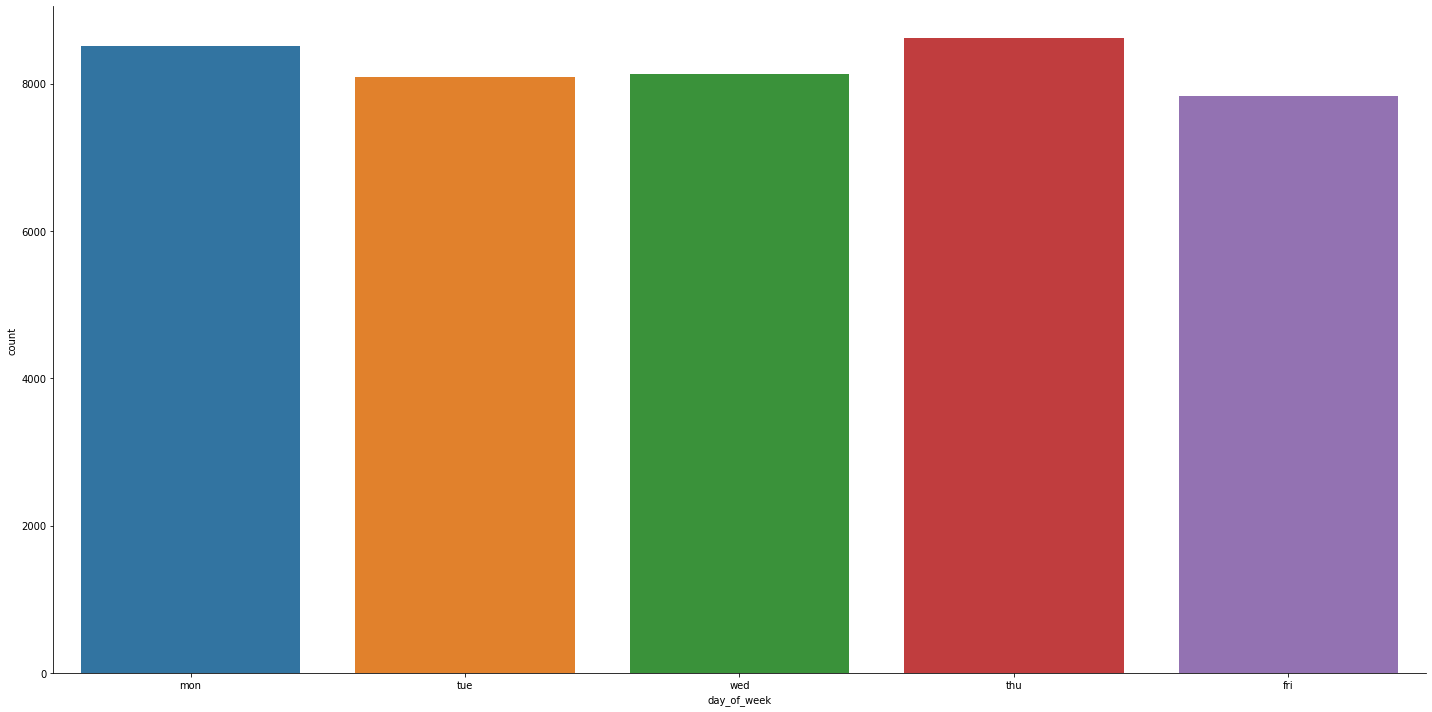

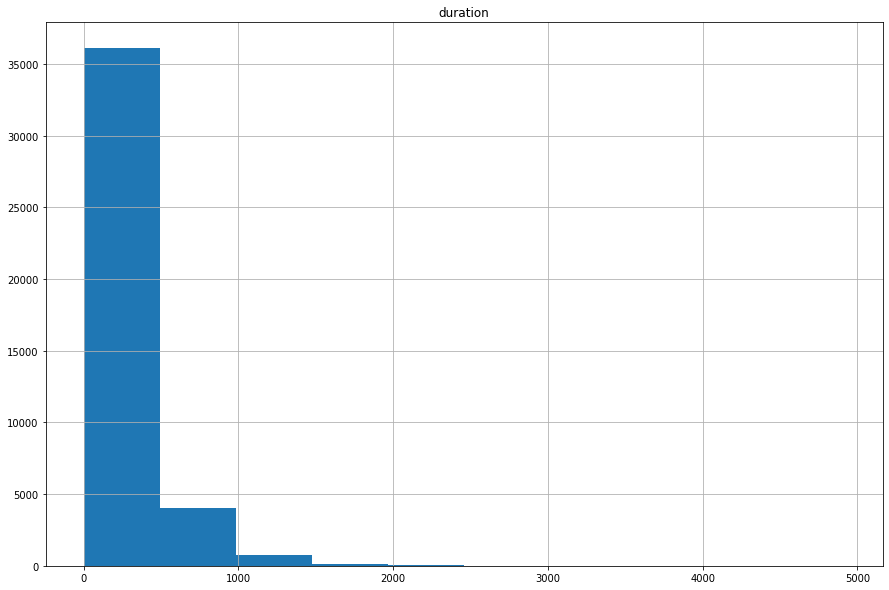

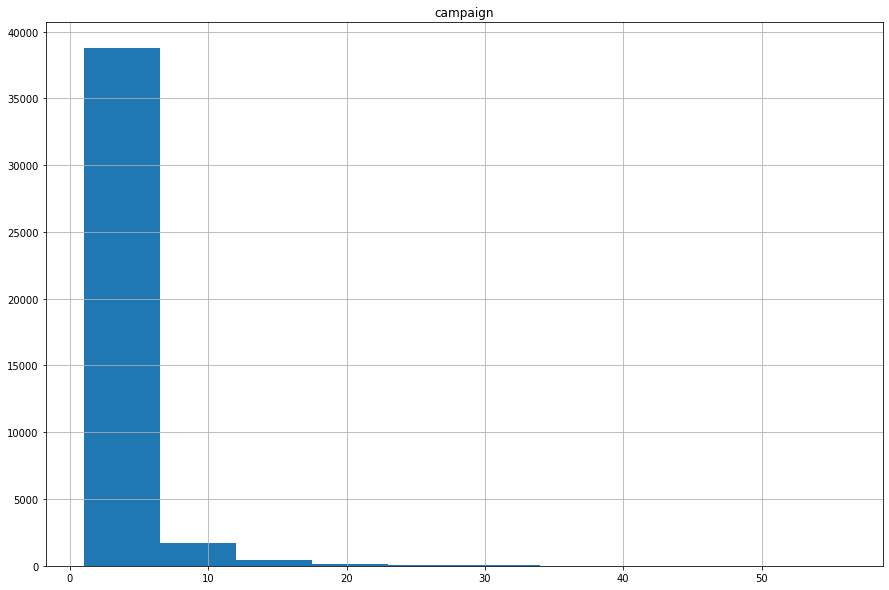

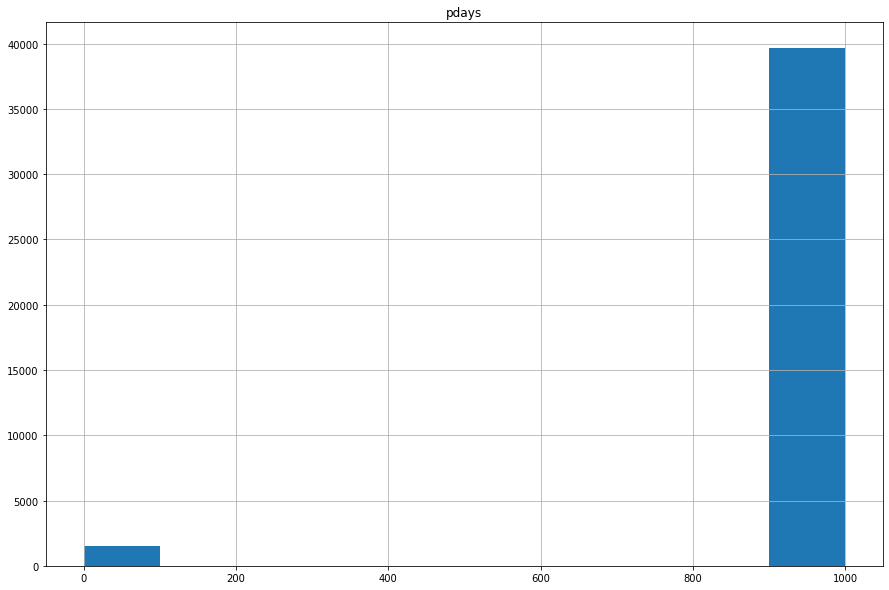

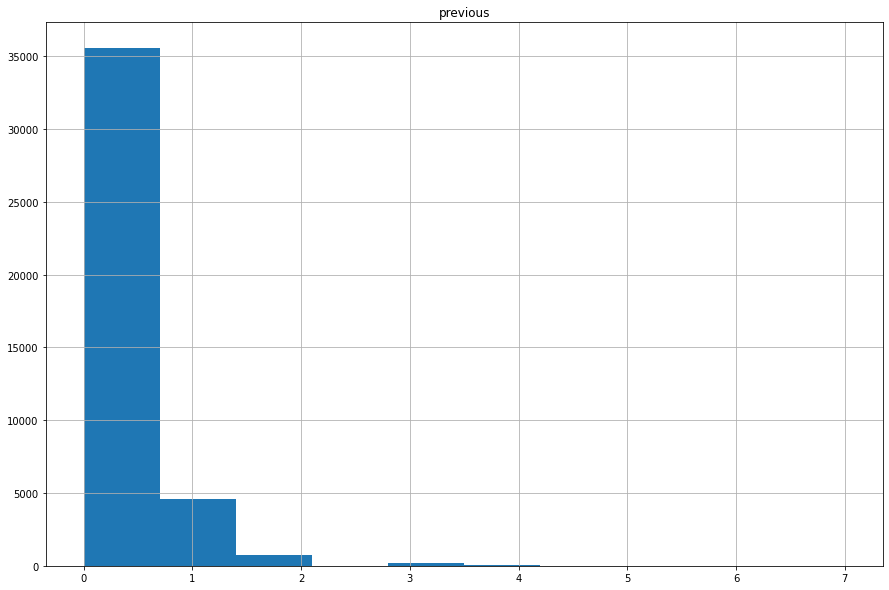

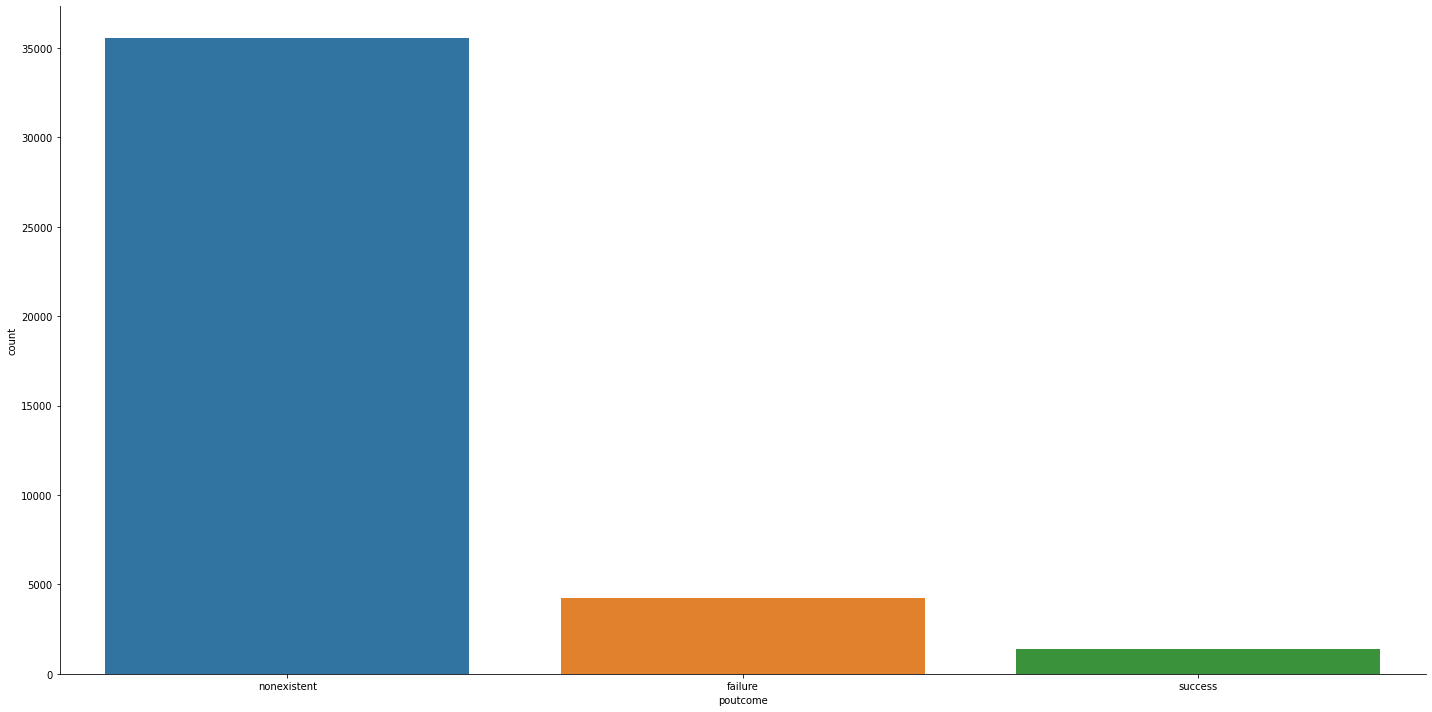

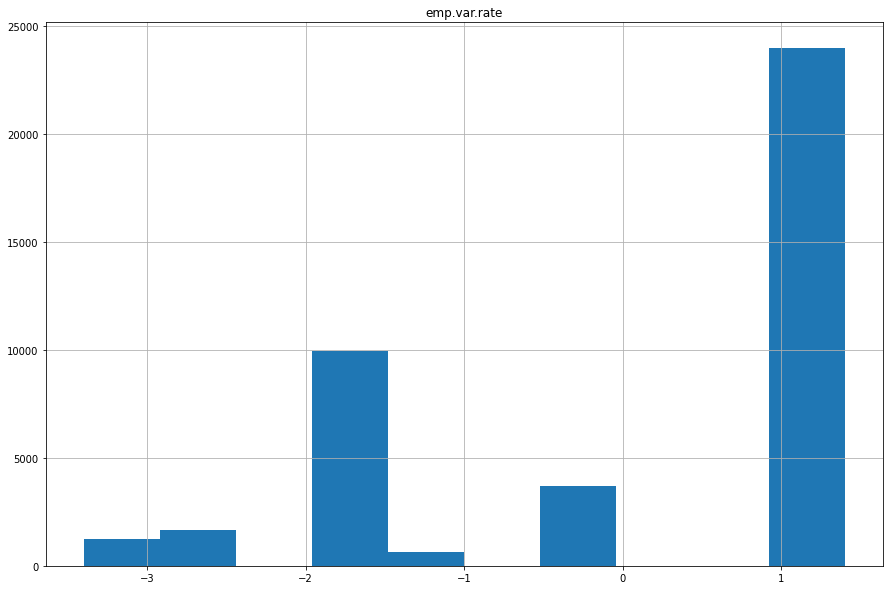

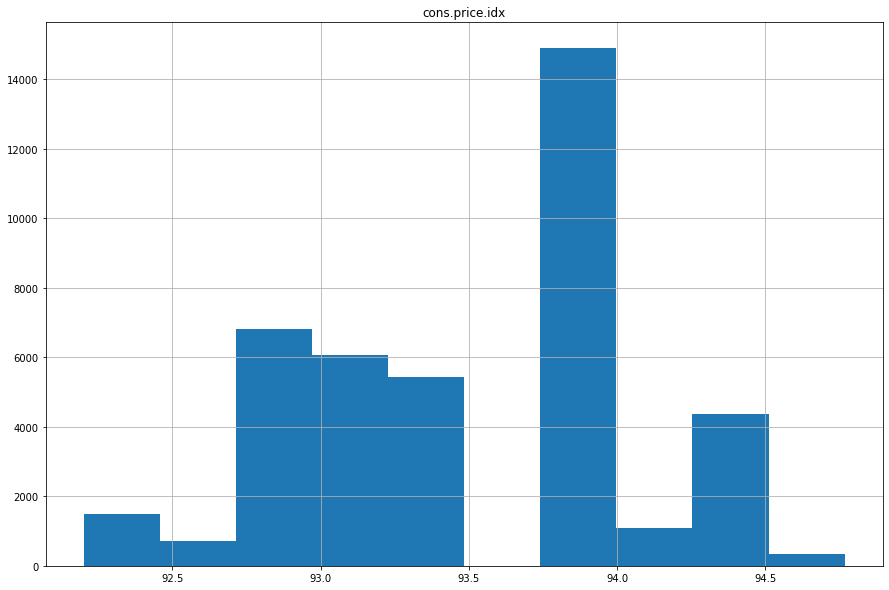

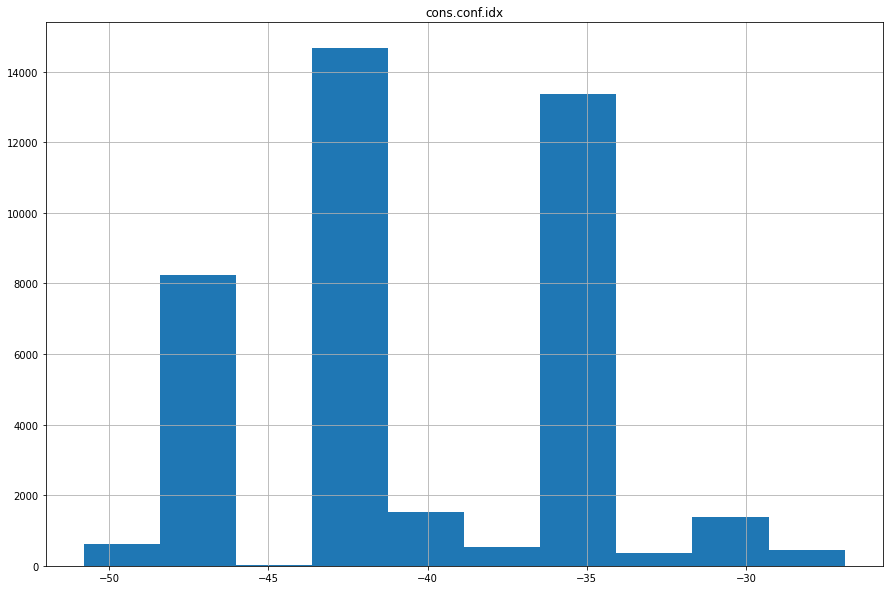

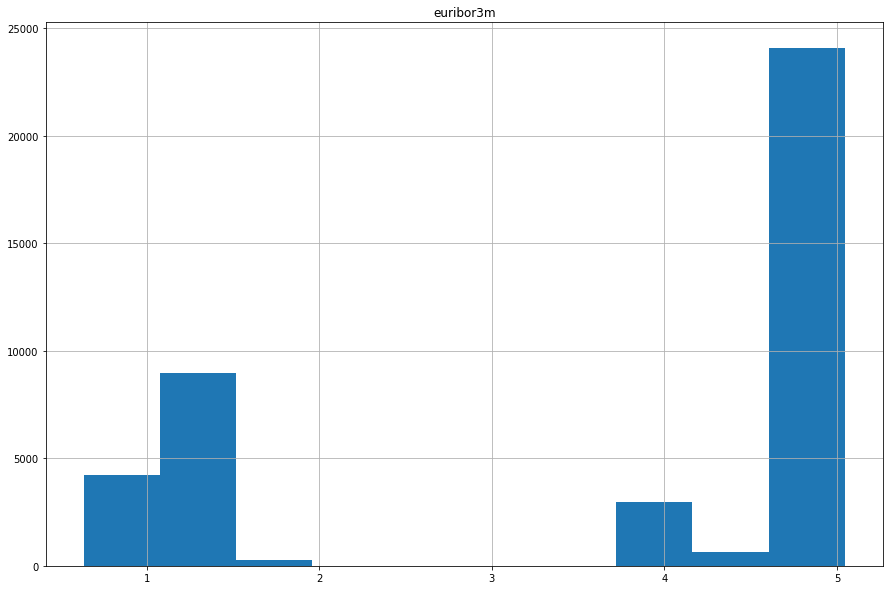

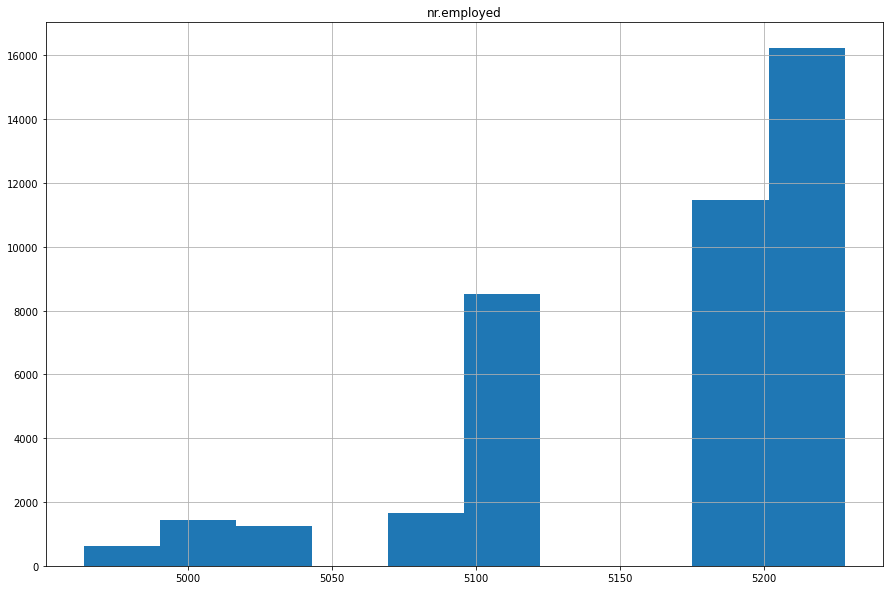

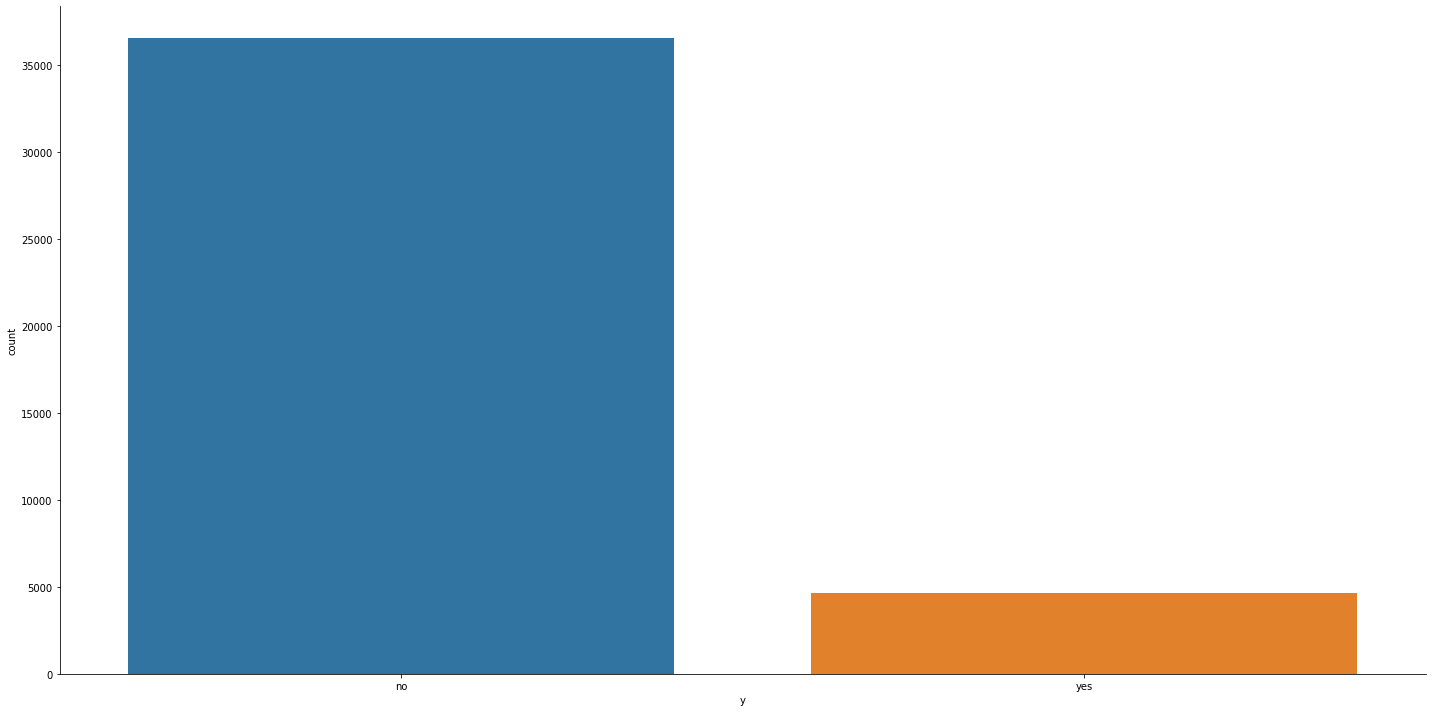

In [13]:
orgWithoutDupsClass = originalSetWithoutDups['y']
orgWithoutDupsFeatures = originalSetWithoutDups.loc[:, originalSetWithoutDups.columns != 'y']
categoricFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes == object].index)
numericFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes != object].index)
for column in originalSetWithoutDups.columns:
    #print('Value distribution for column \'' + column + '\' : \n')
    #print(originalSetWithoutDups[column].value_counts(), '\n')
    #print('Histogram for distribution of values for column \'' + column + '\' : \n')
    if (originalSetWithoutDups.dtypes[column].name.__eq__('object')):
        sb.catplot(x=column, kind='count', data=originalSetWithoutDups, height=10, aspect=2)
    else:
        originalSetWithoutDups.hist(column=column, figsize=[15,10])

In [14]:
originalSetWithoutDups.mode(axis=0)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31.0,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.994,-36.4,4.857,5228.0,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation

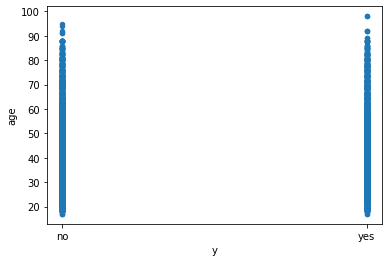

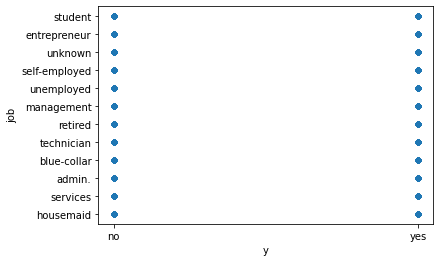

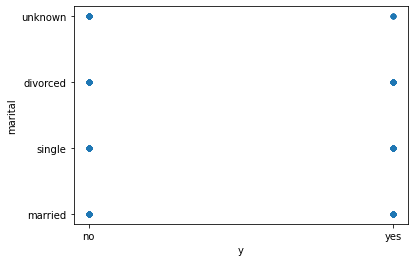

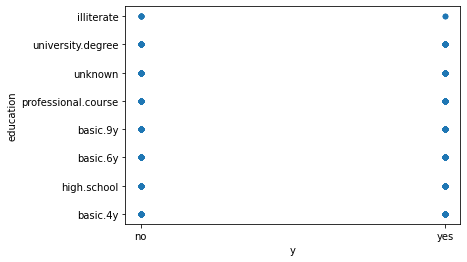

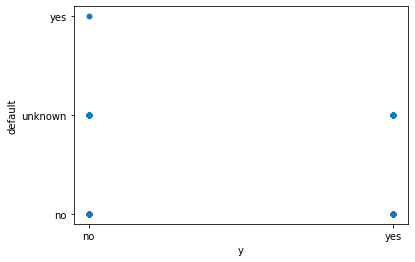

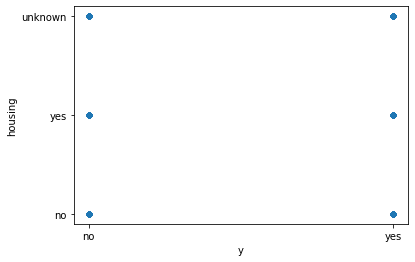

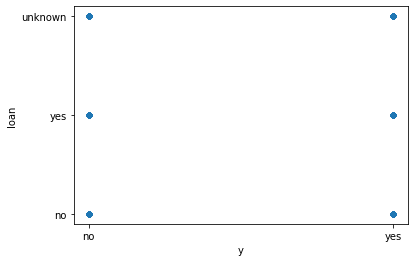

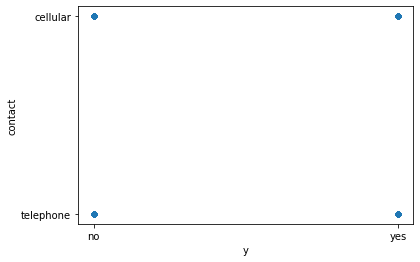

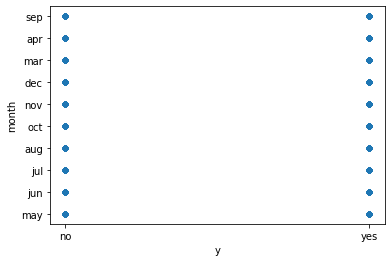

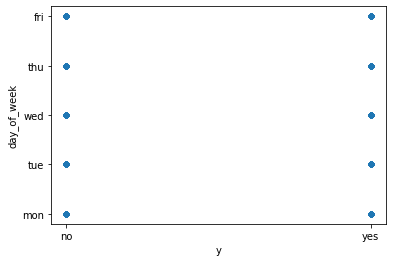

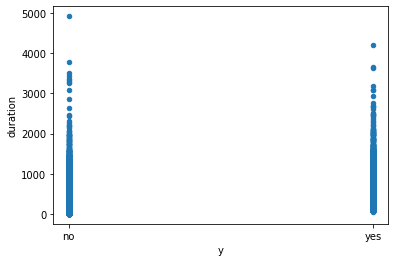

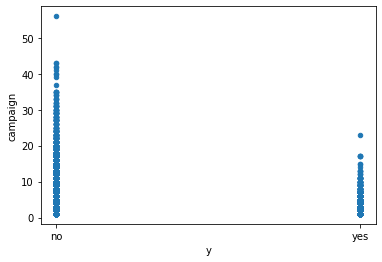

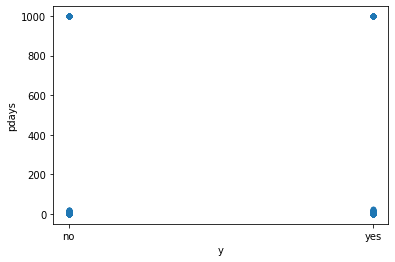

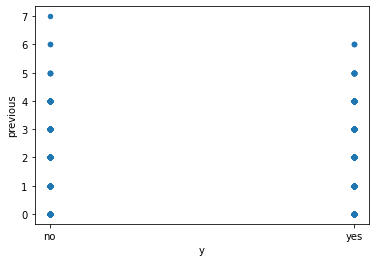

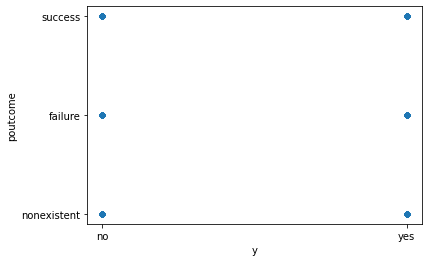

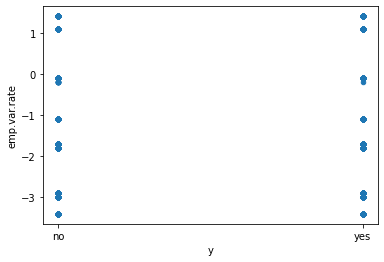

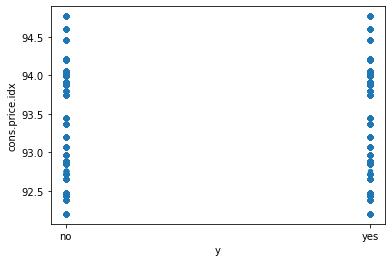

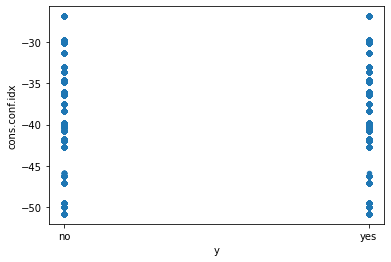

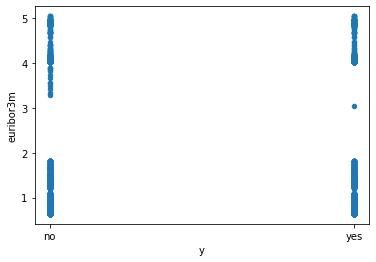

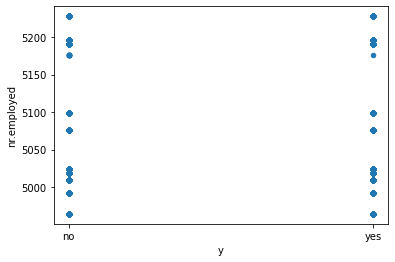

In [15]:
for column in originalSetWithoutDups.columns:
    if (column != 'y'):
        originalSetWithoutDups.plot(x='y', y=column, kind='scatter')

<AxesSubplot:>

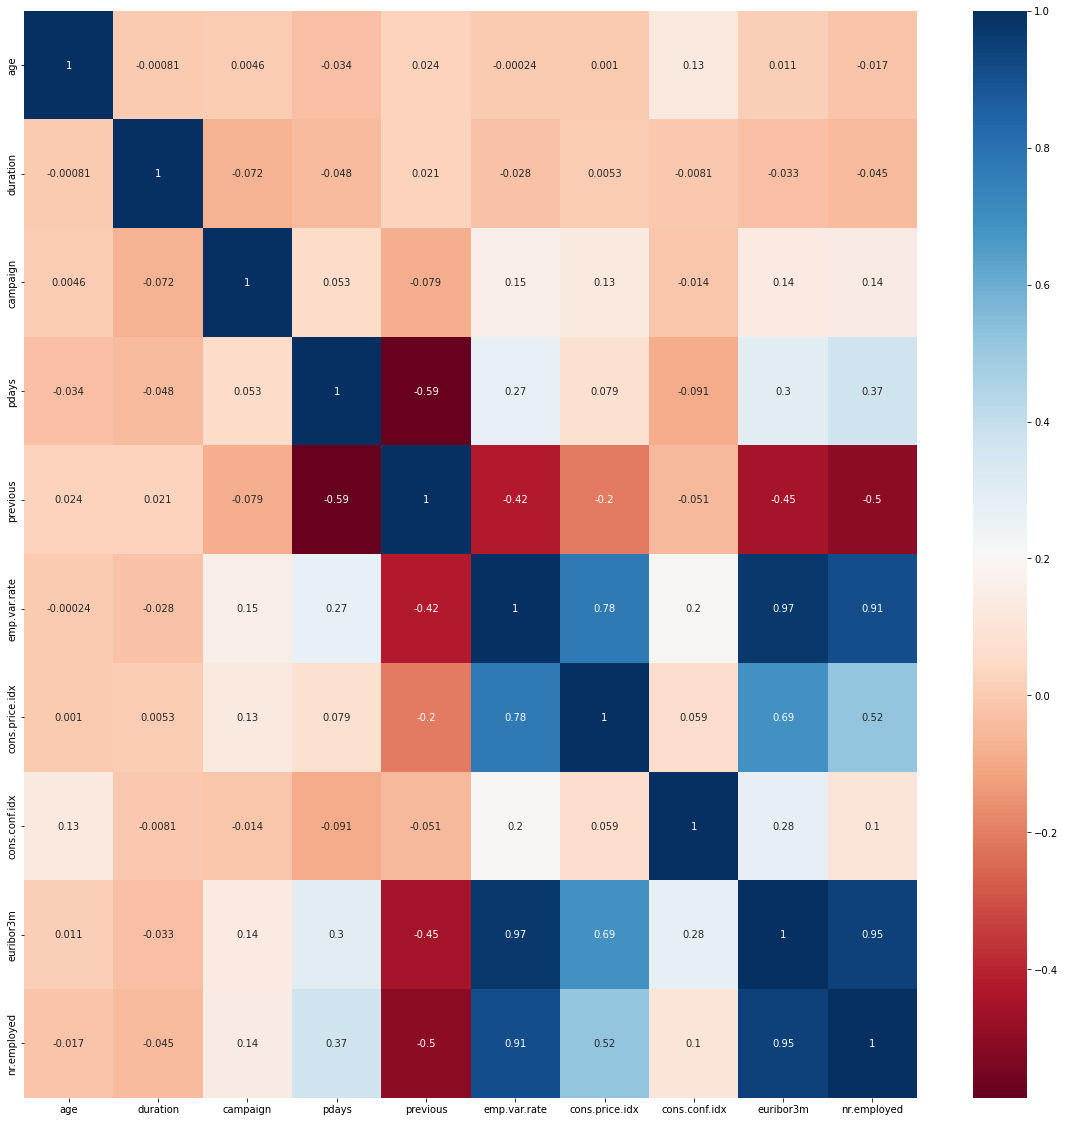

In [16]:
fig, ax = plt.subplots(figsize = (20,20))
sb.heatmap(originalSetWithoutDups.corr(method='pearson'), annot=True, cmap='RdBu', ax=ax)

<AxesSubplot:>

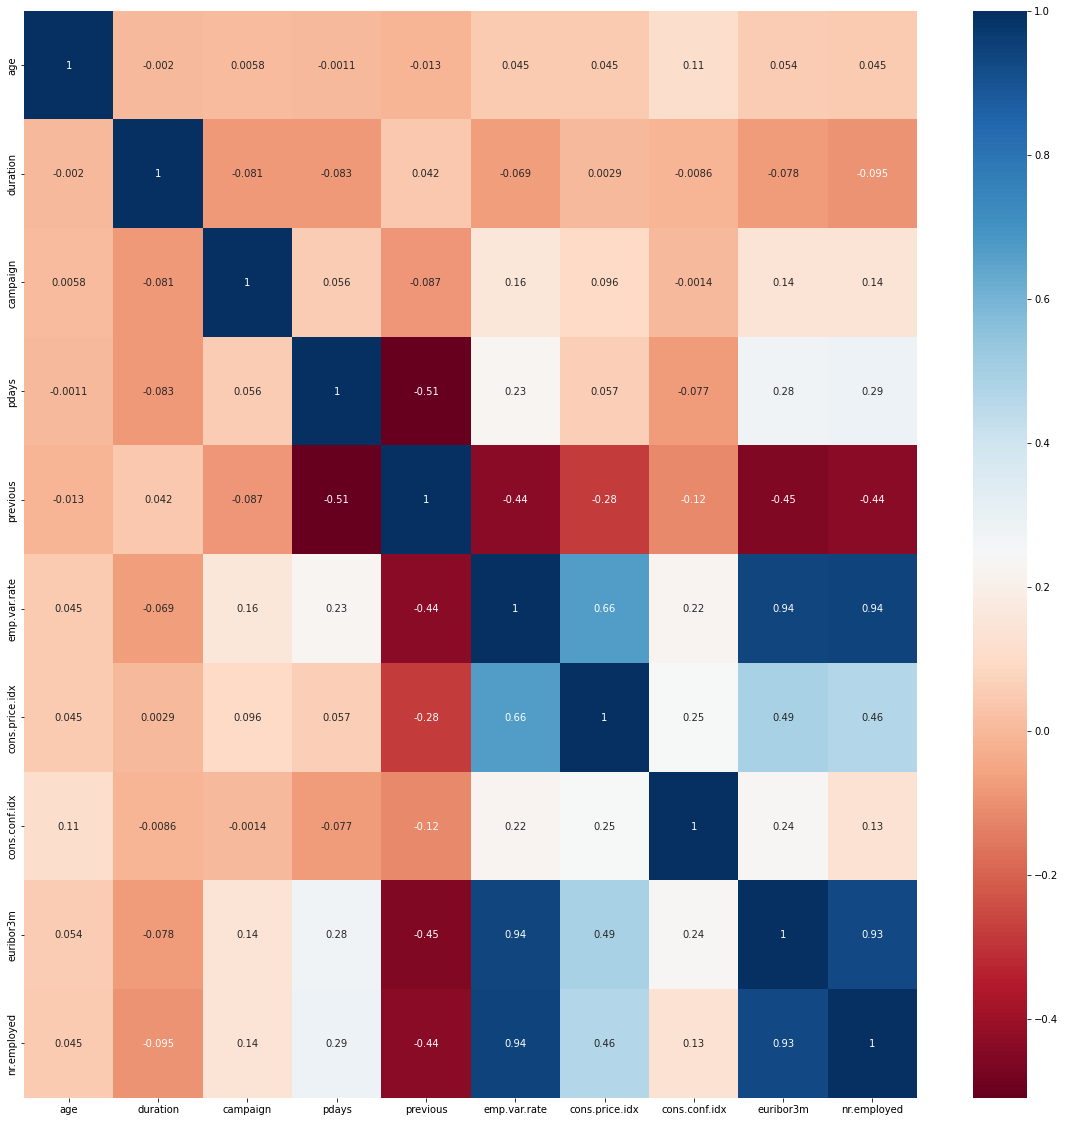

In [17]:
fig2, ax2 = plt.subplots(figsize = (20,20))
sb.heatmap(originalSetWithoutDups.corr(method='spearman'), annot=True, cmap='RdBu', ax=ax2)

AxesSubplot(0.125,0.125;0.62x0.755)


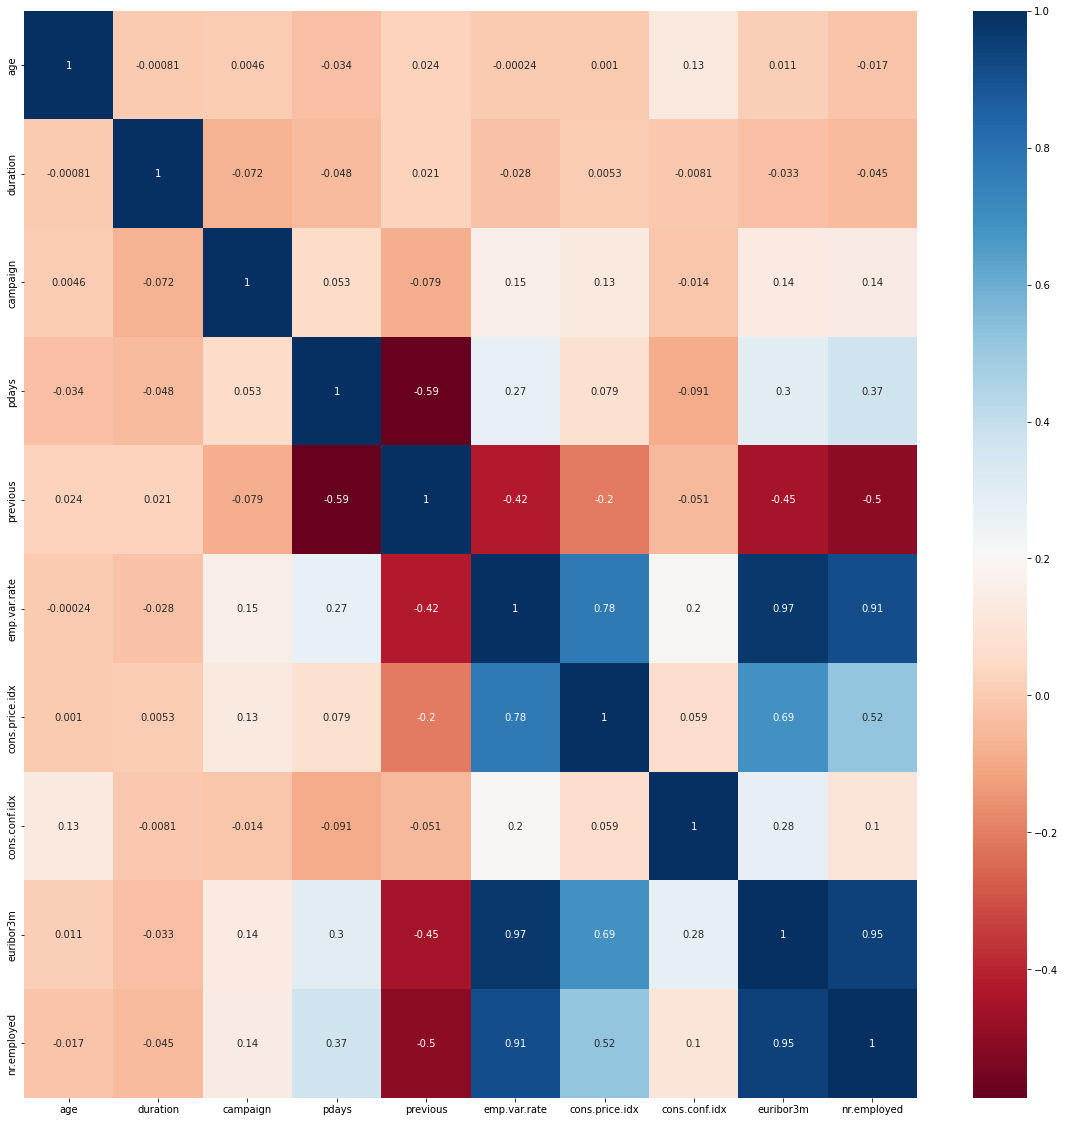

In [18]:
#originalSetWithoutDups.corr(method='kendall')
fig3, ax3 = plt.subplots(figsize = (20,20))
print(sb.heatmap(originalSetWithoutDups.corr(method='pearson'), annot=True, cmap='RdBu', ax=ax3))


C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


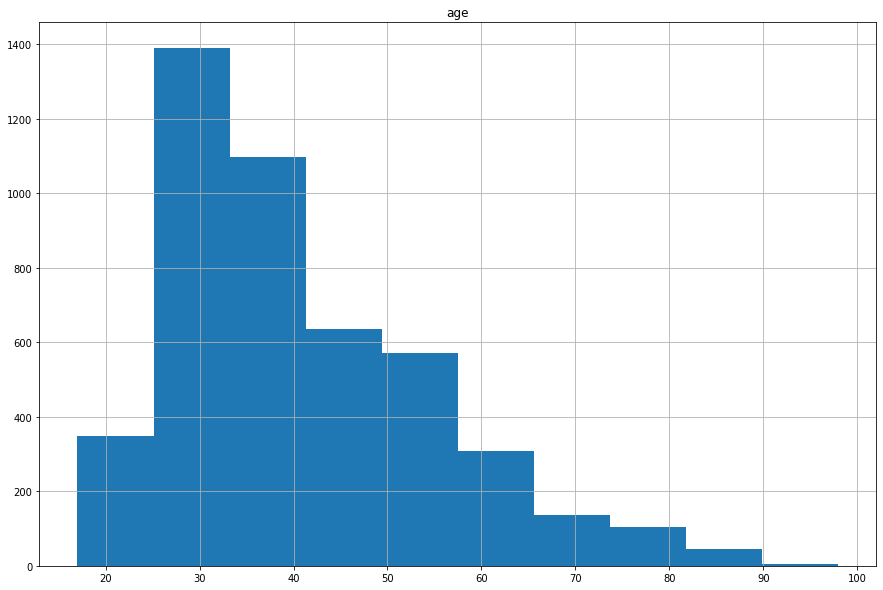

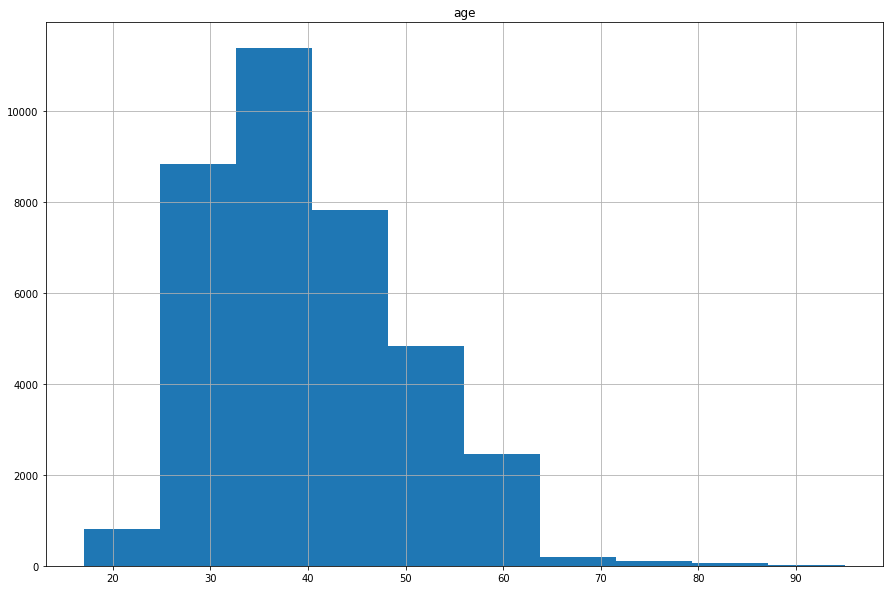

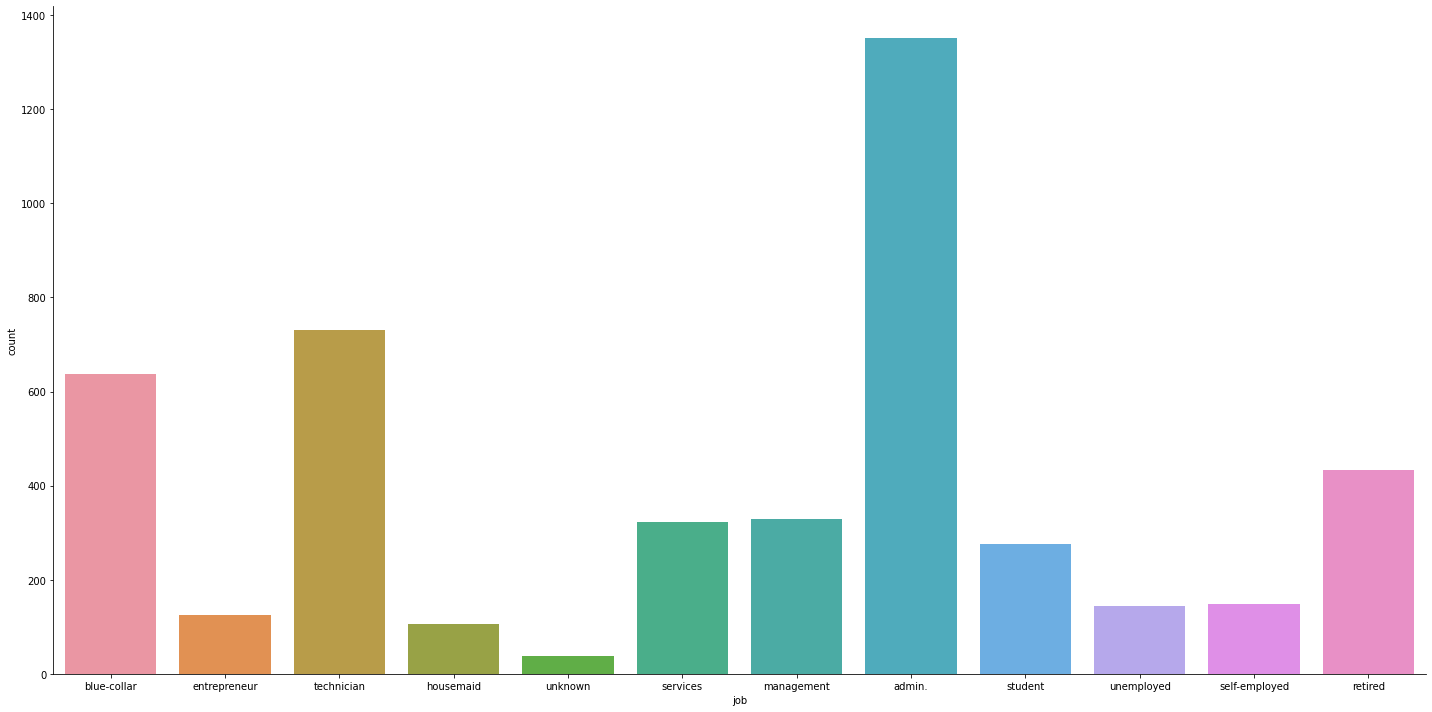

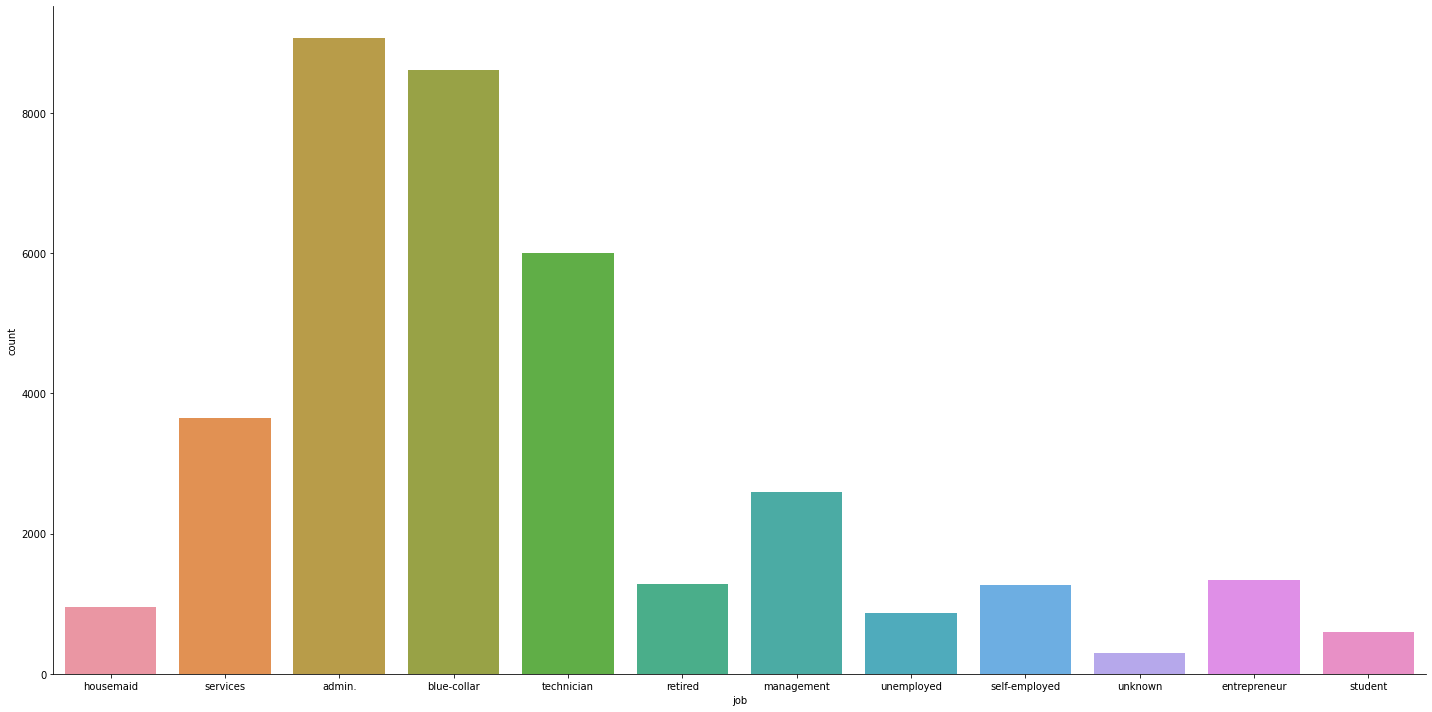

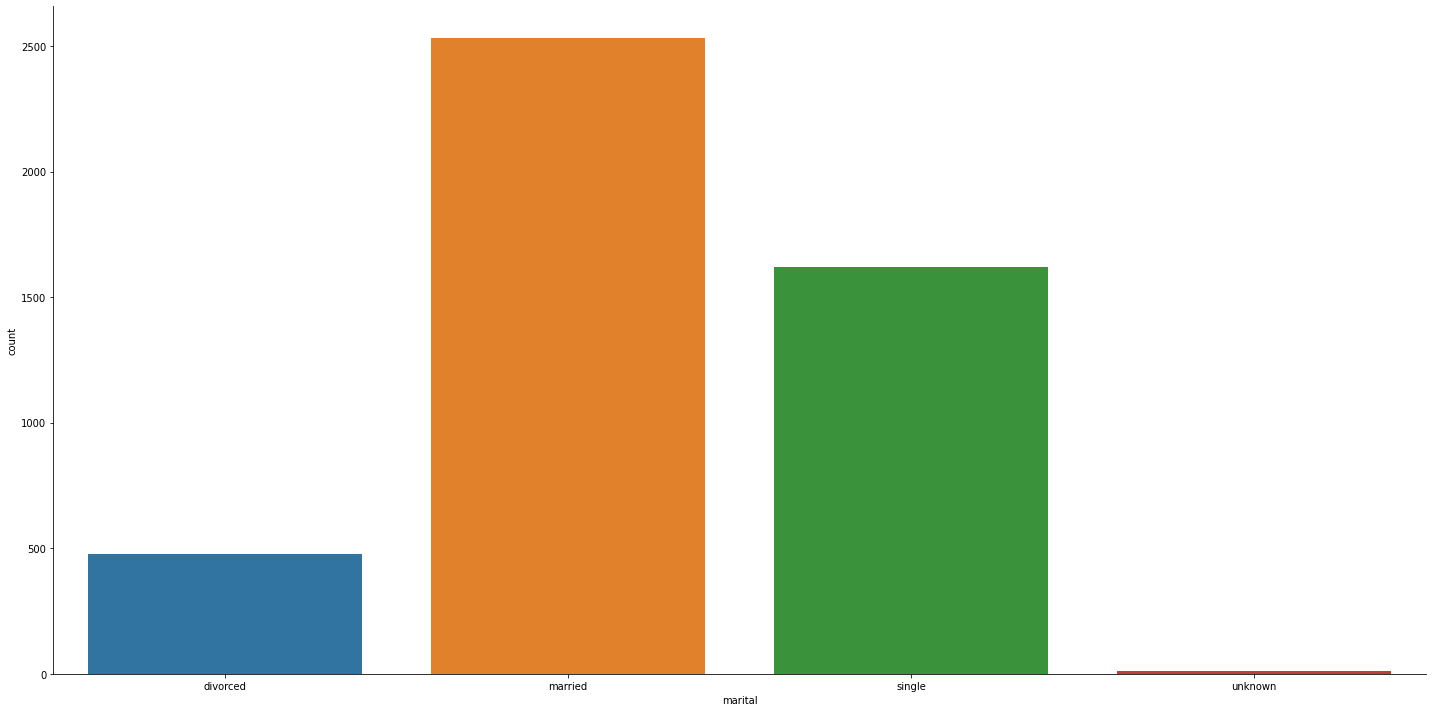

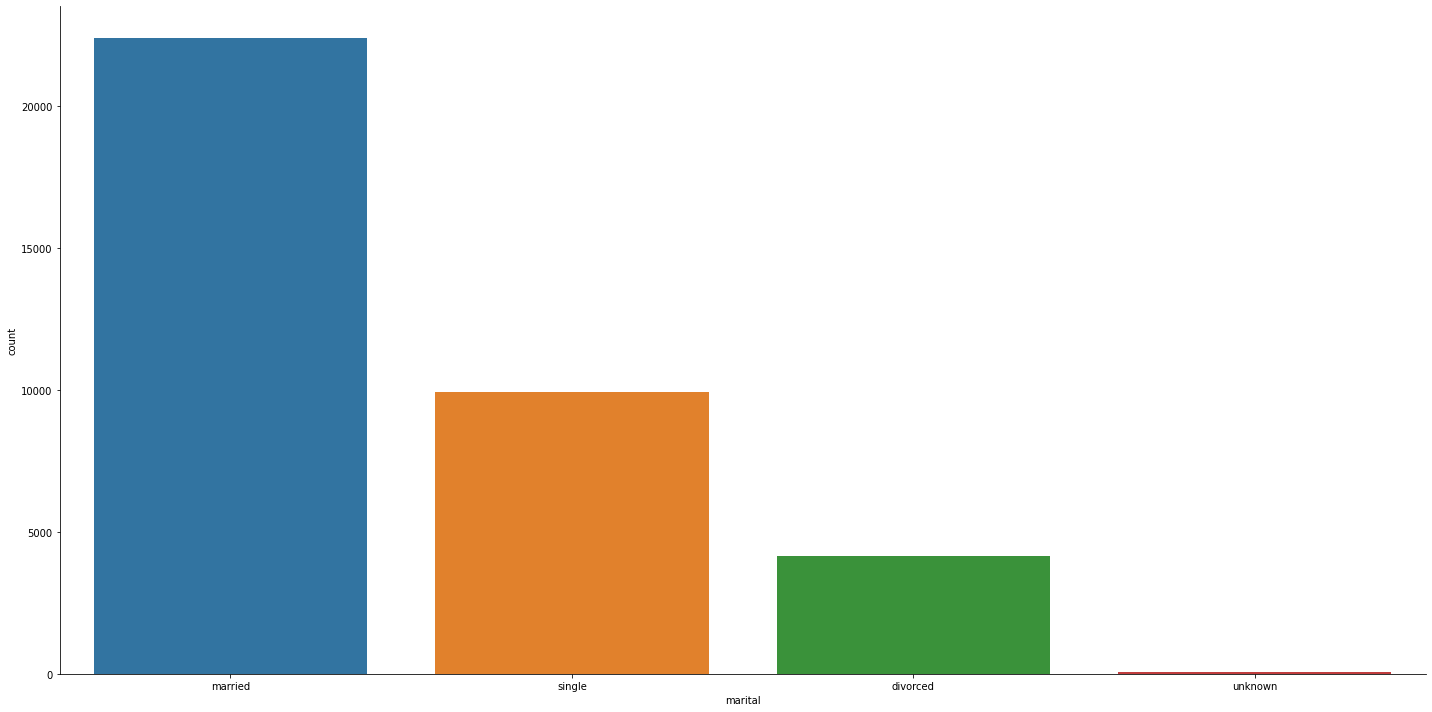

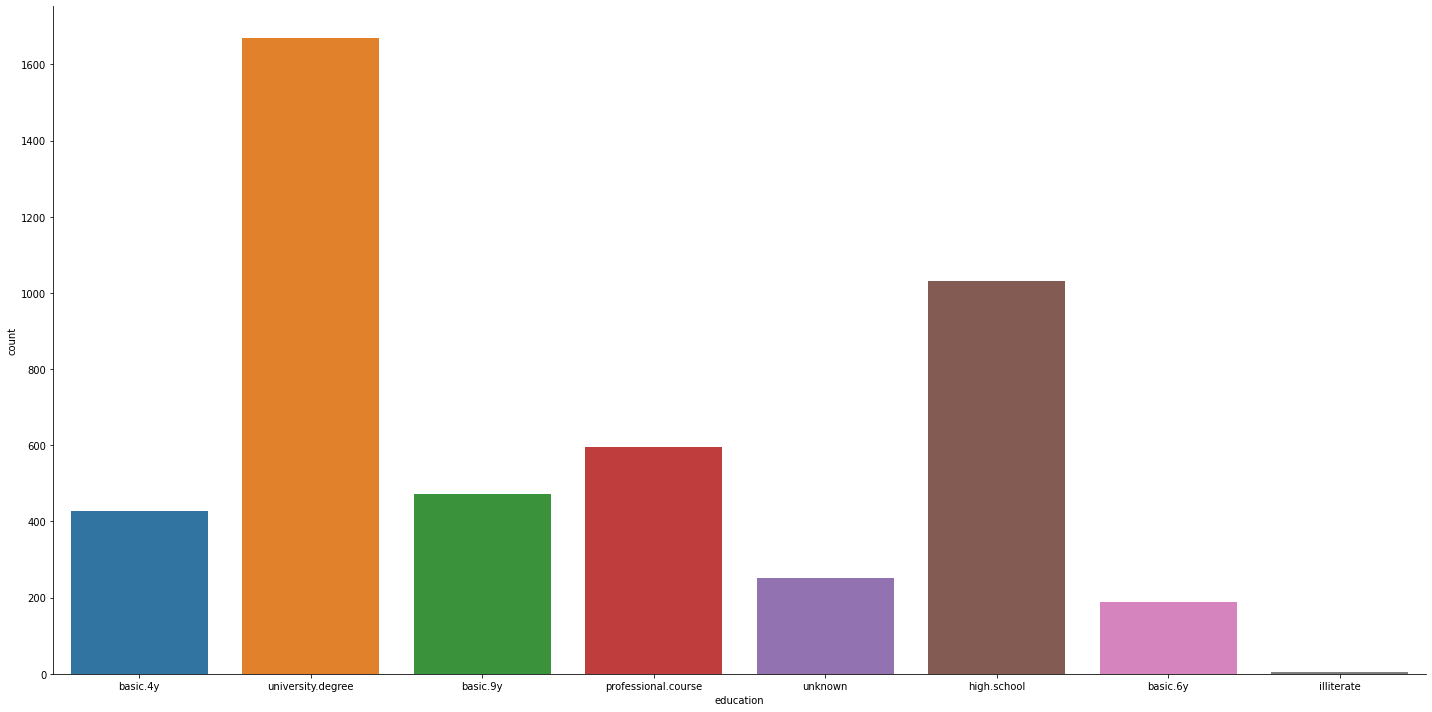

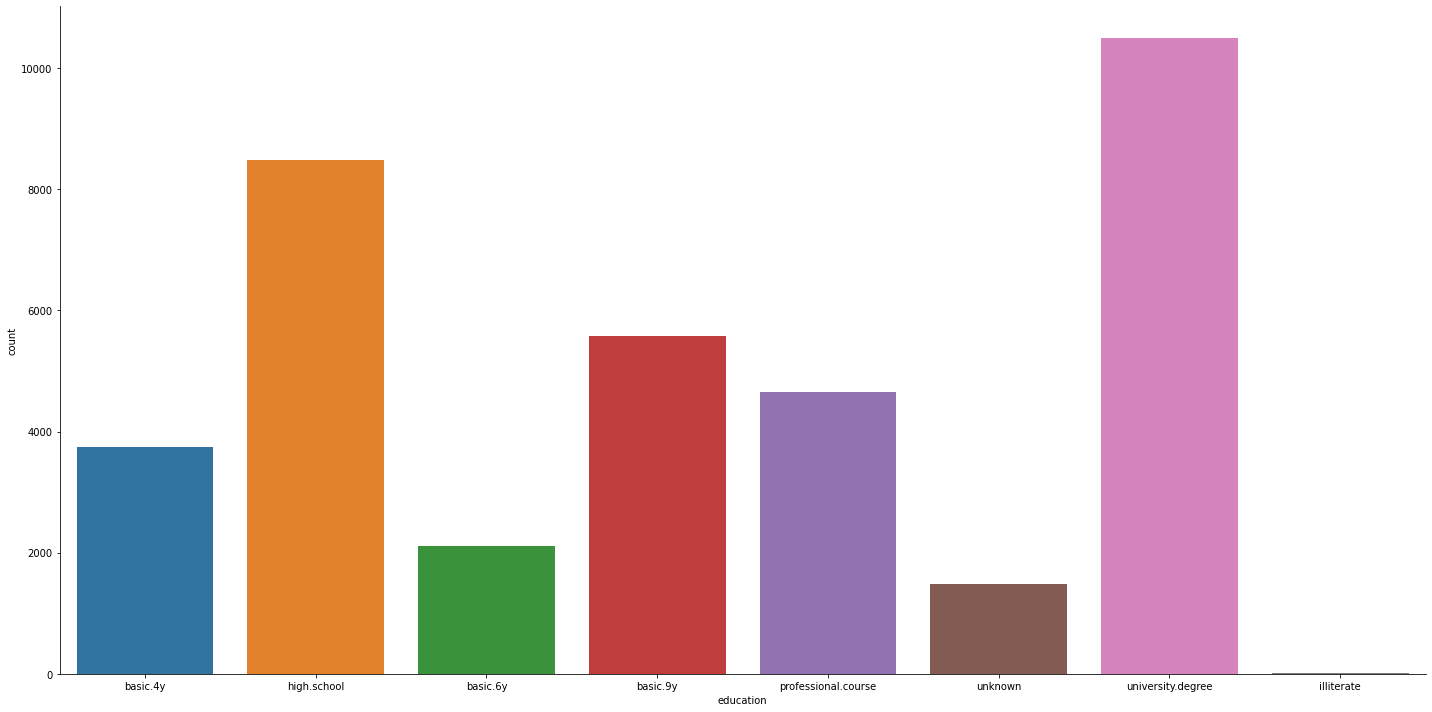

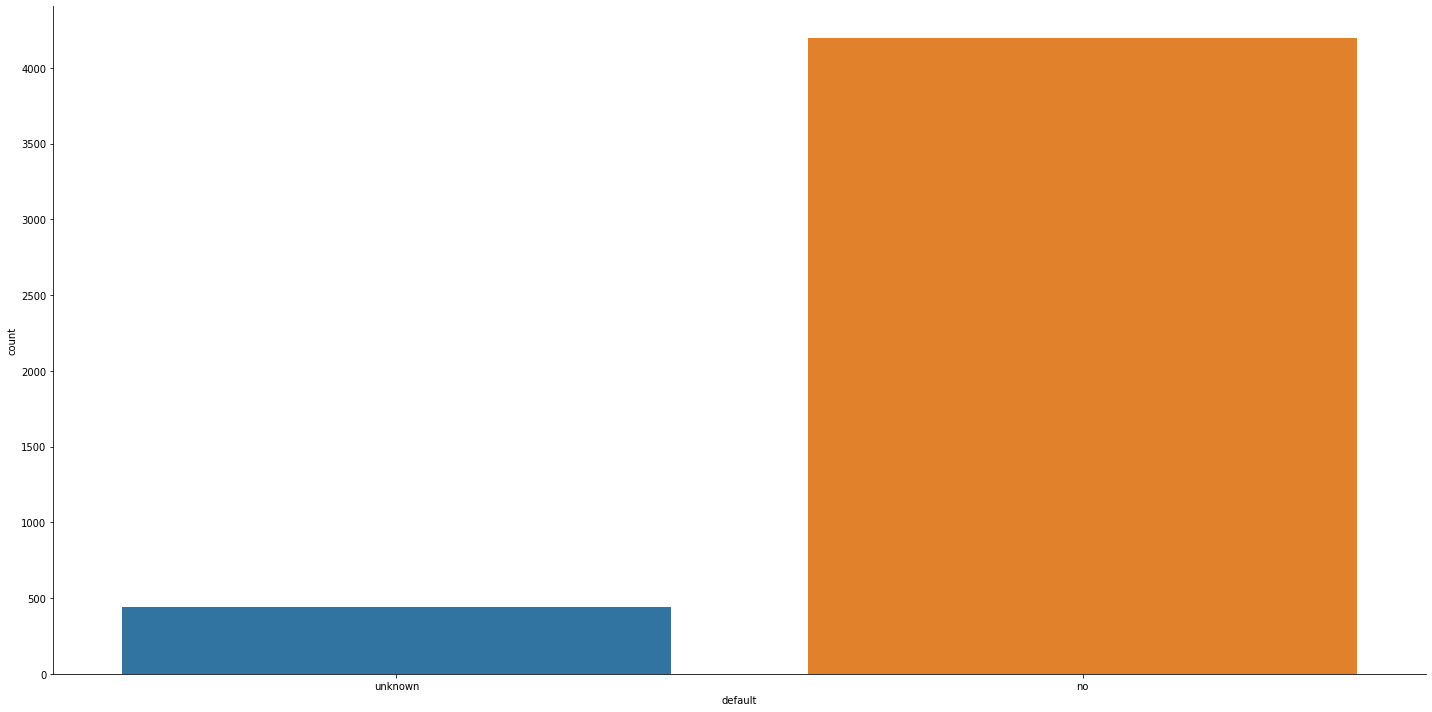

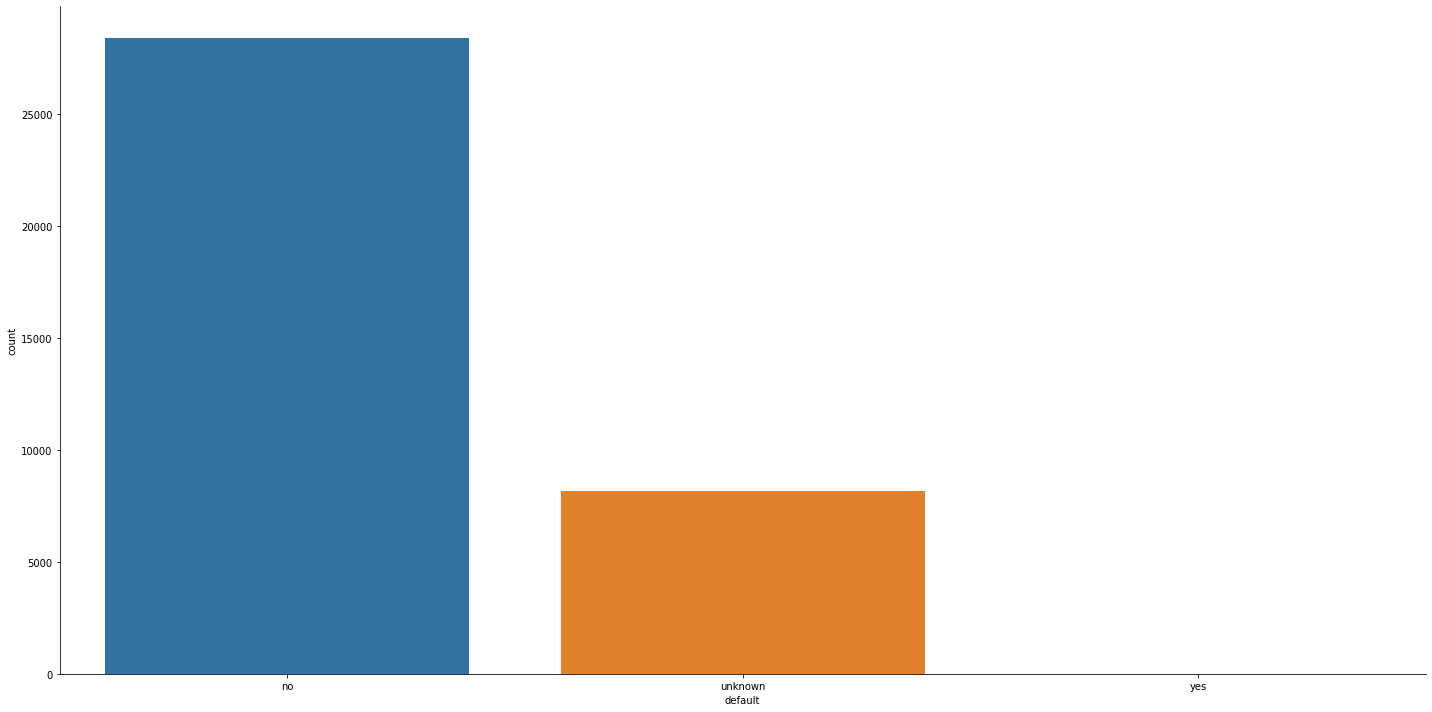

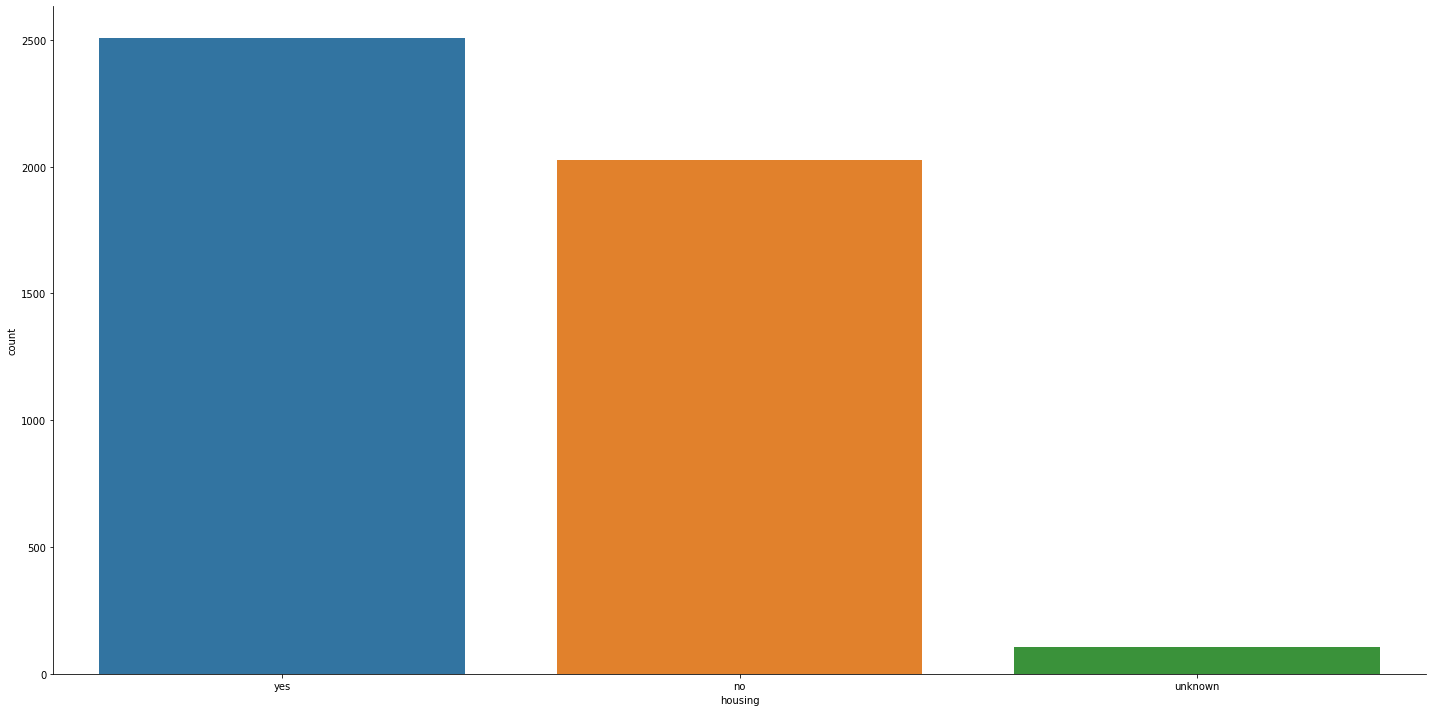

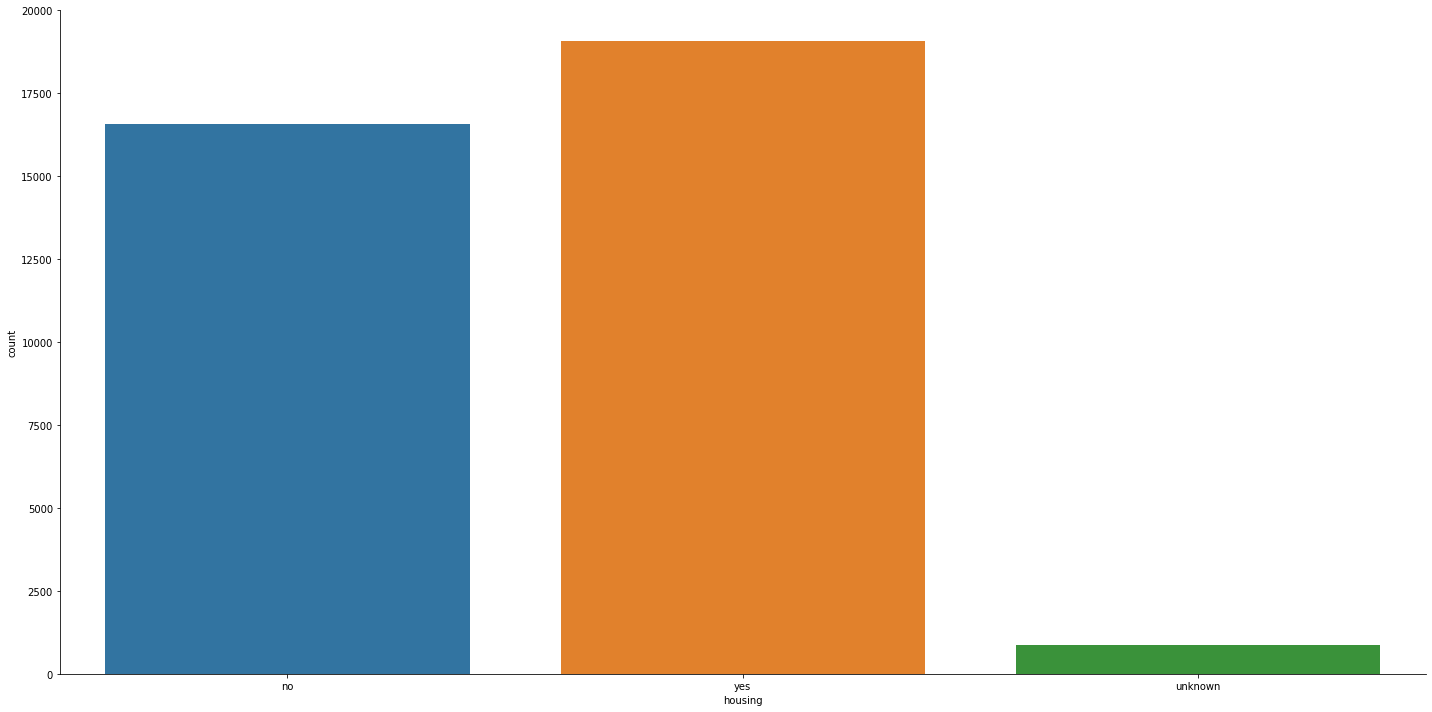

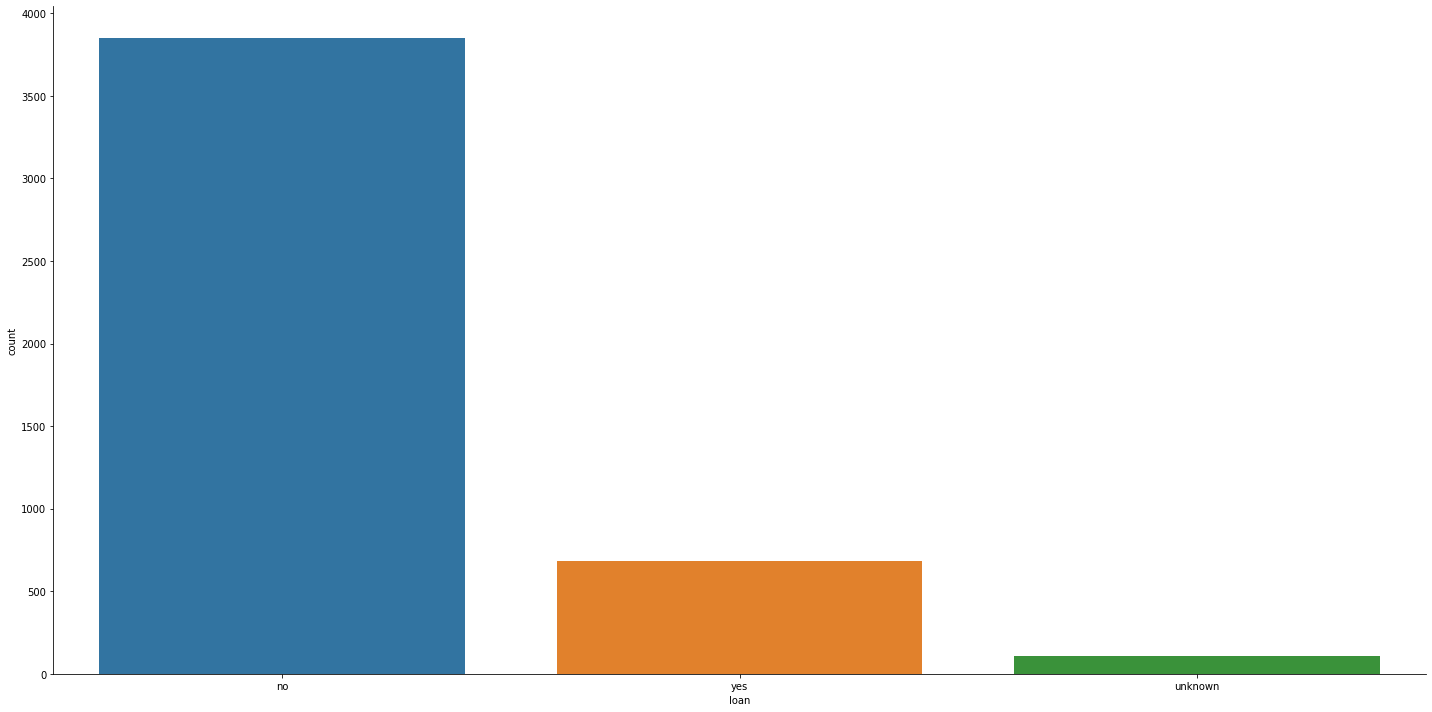

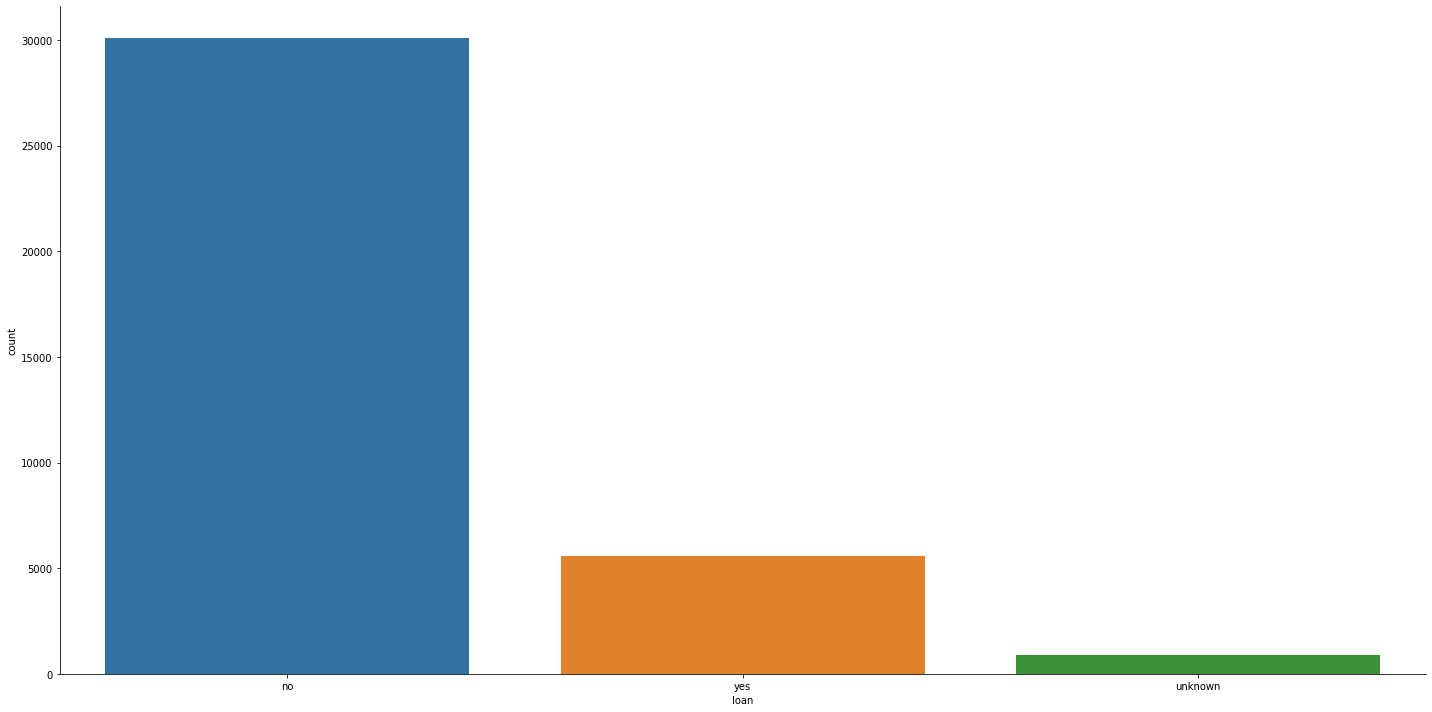

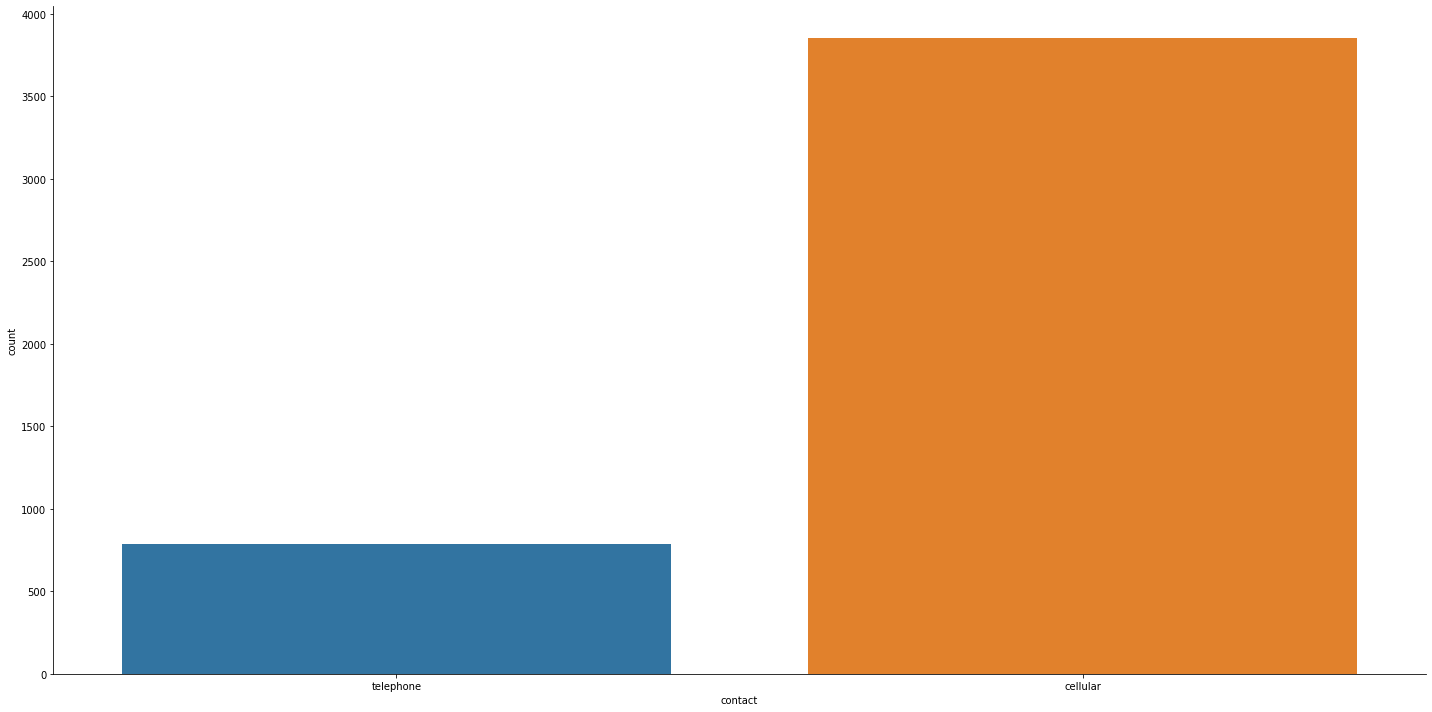

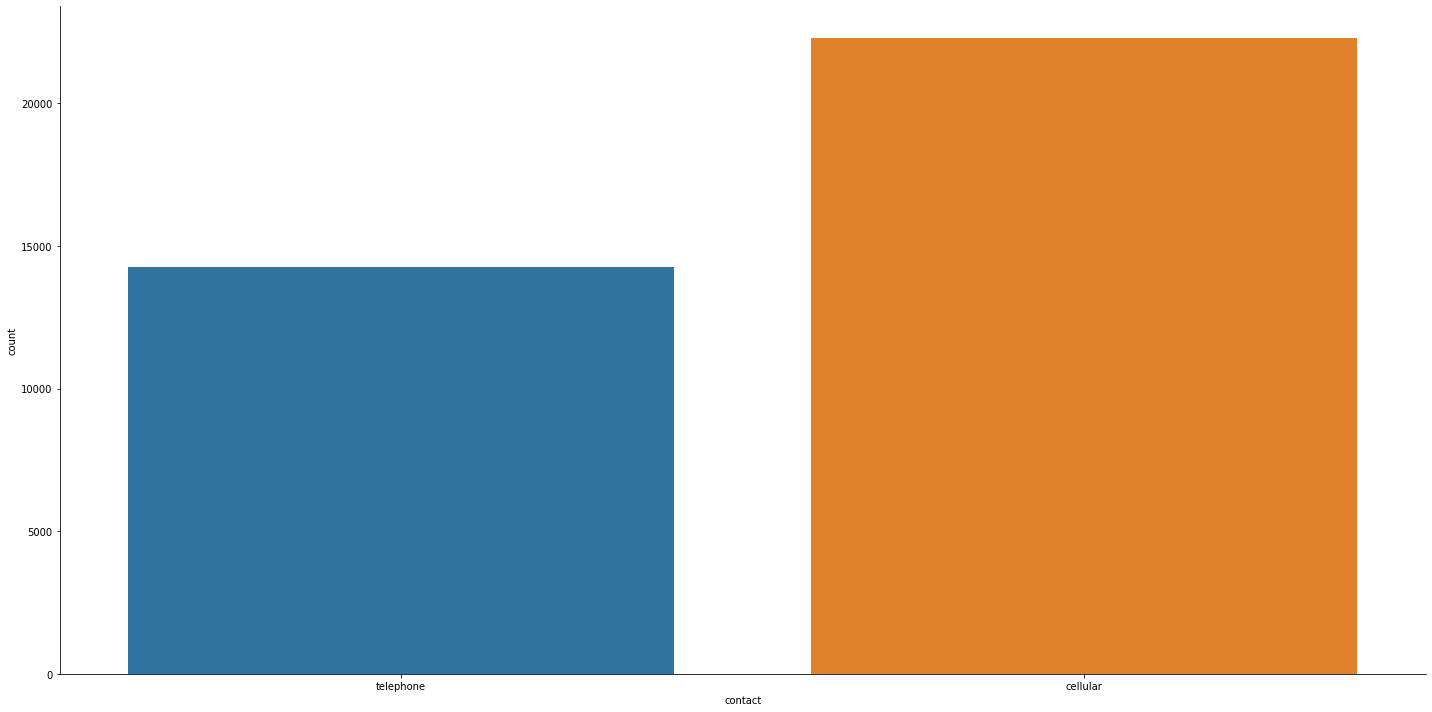

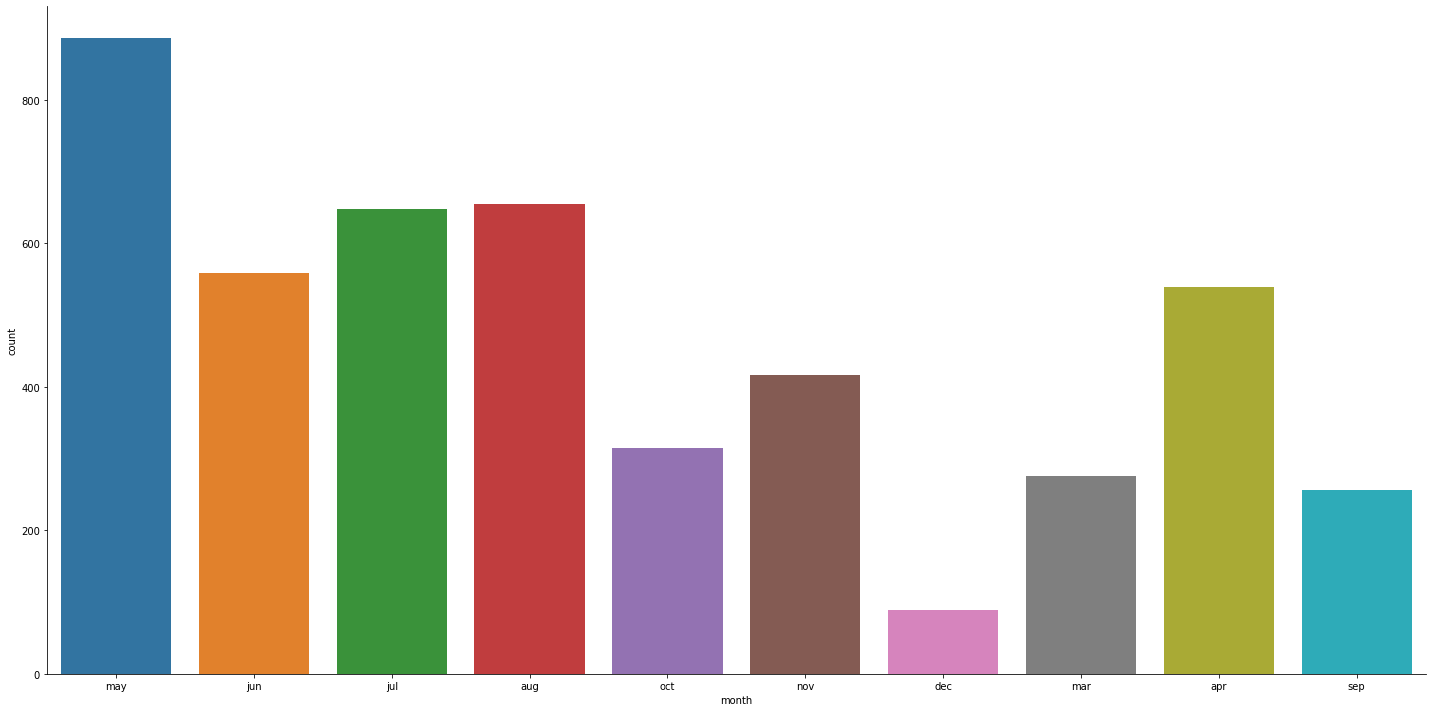

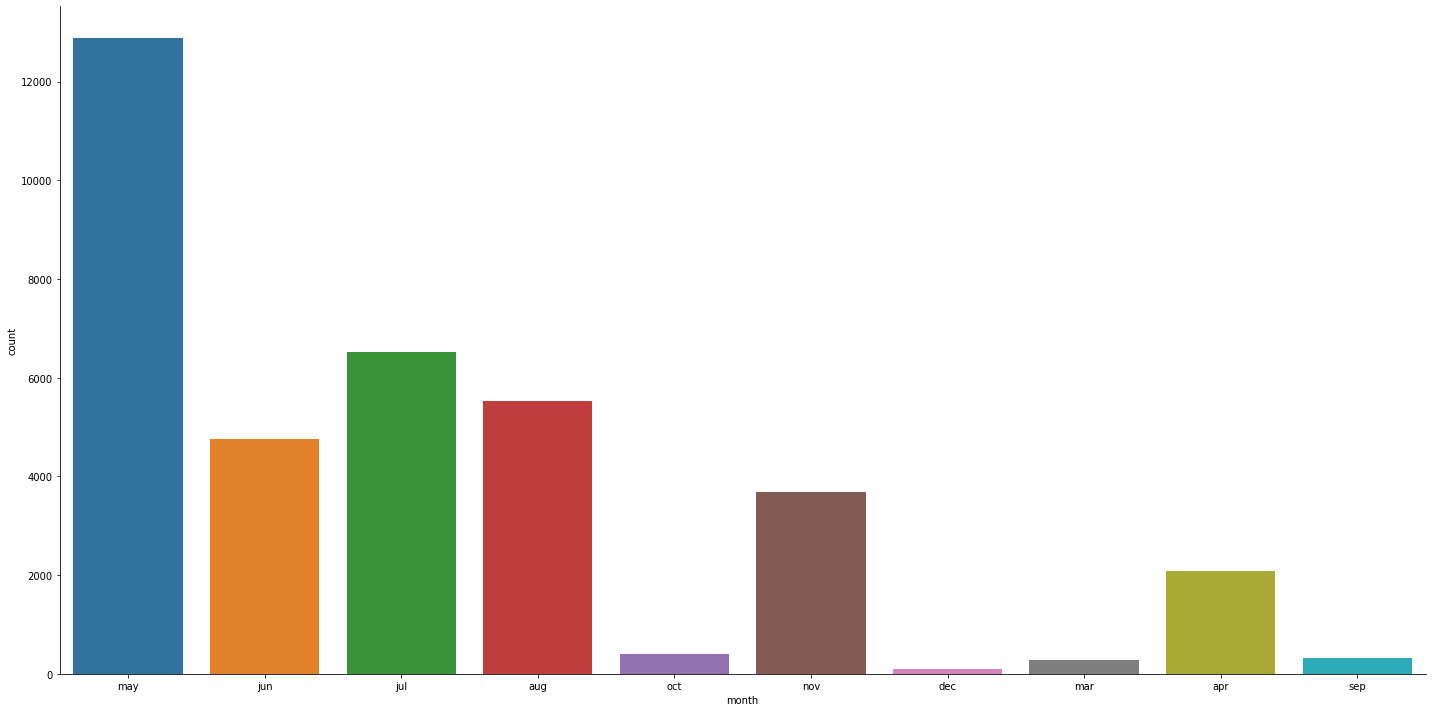

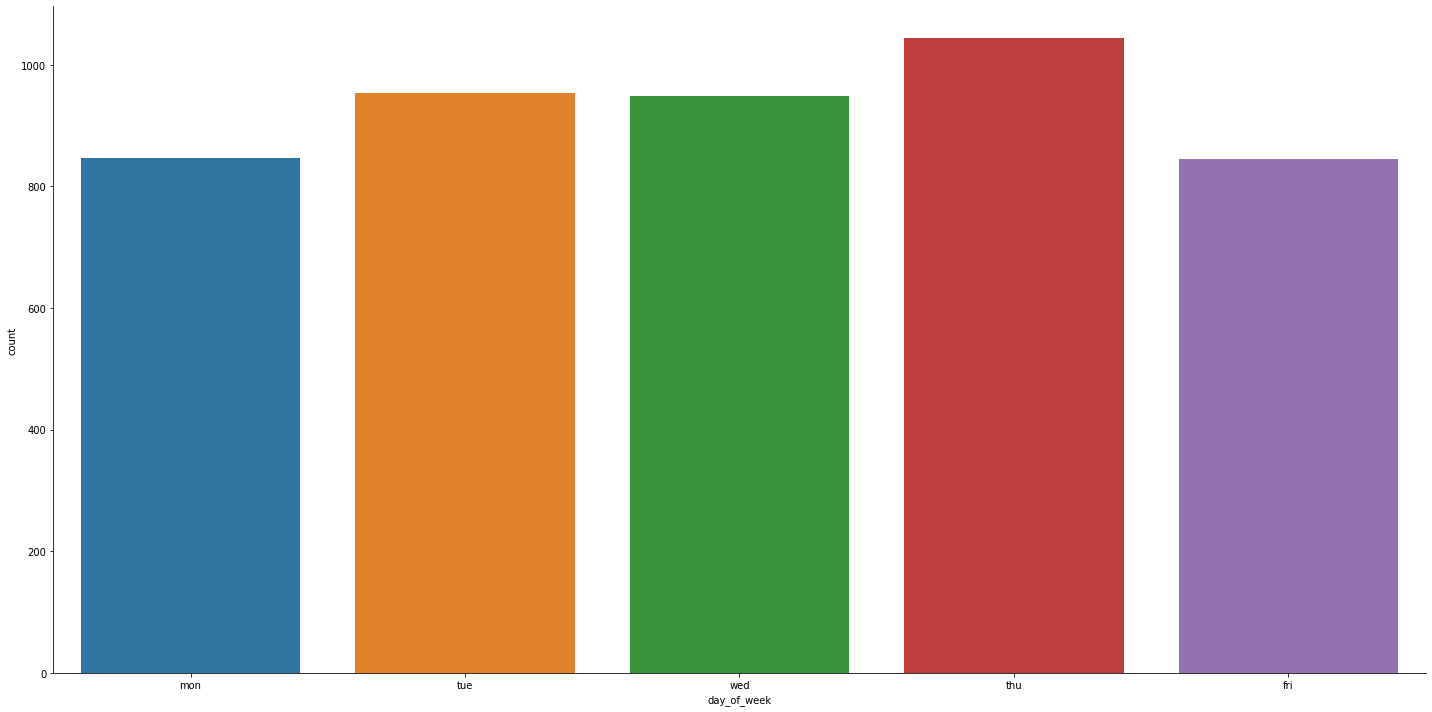

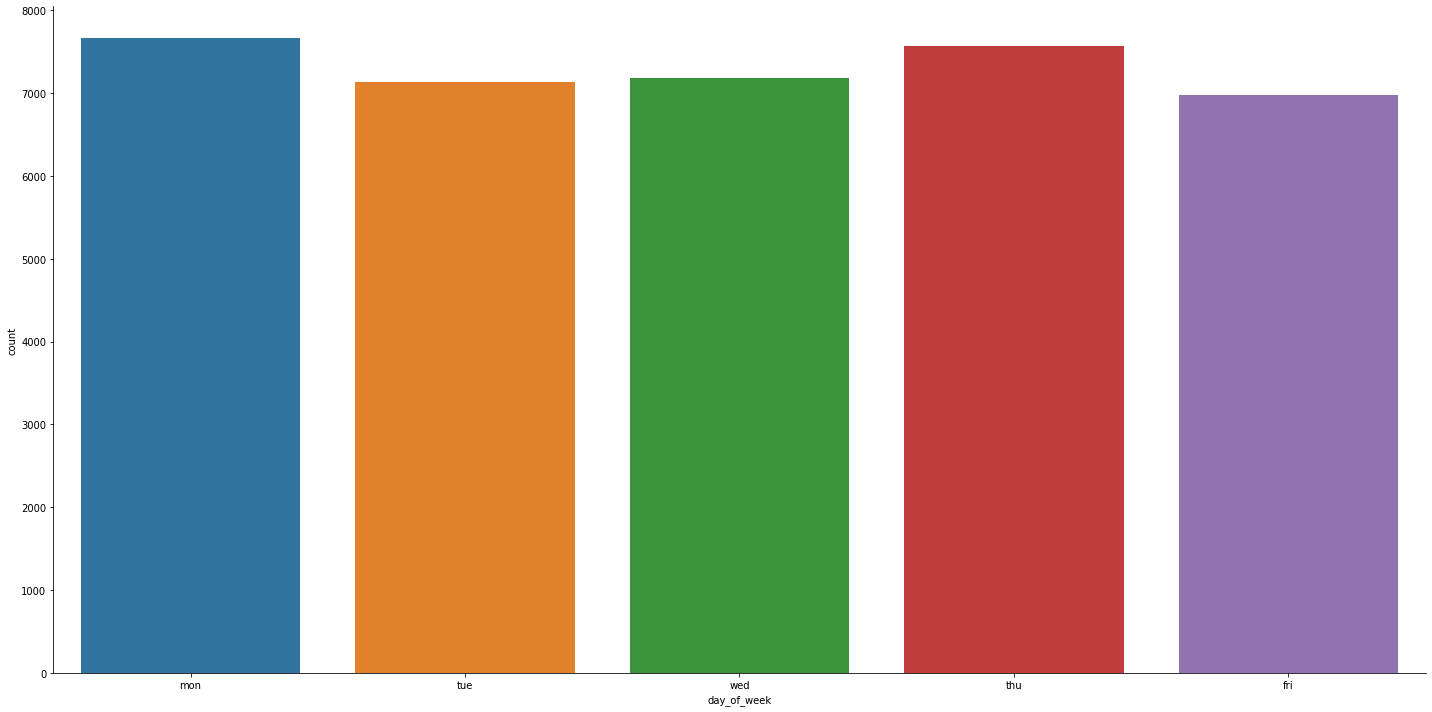

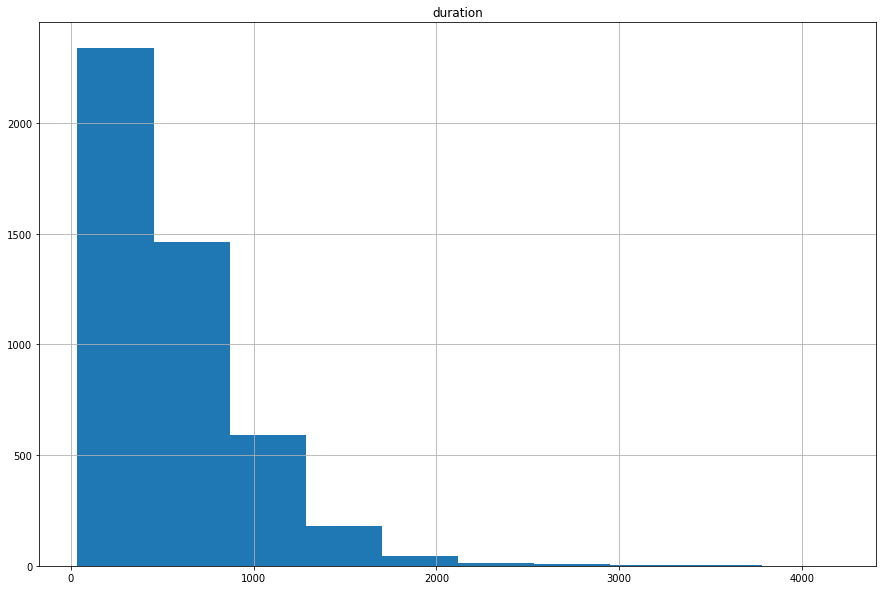

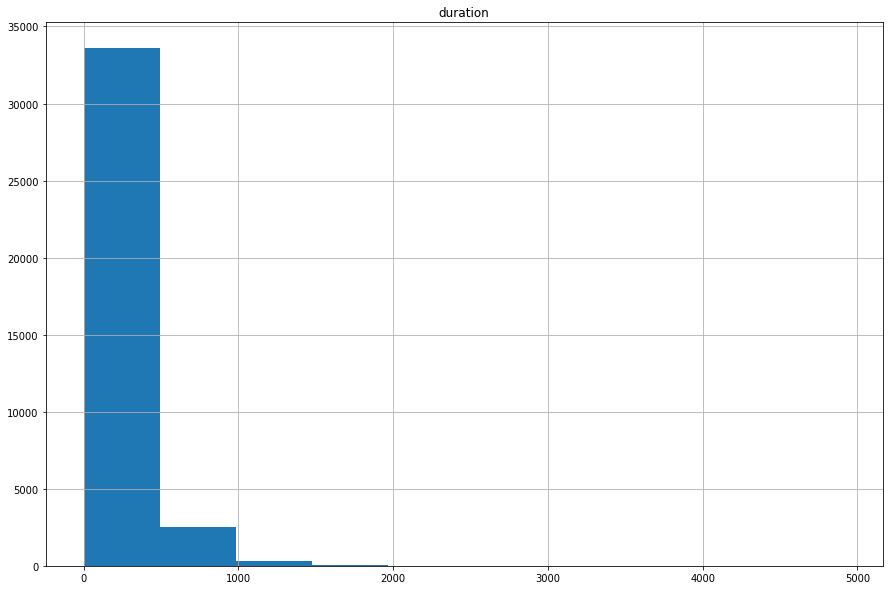

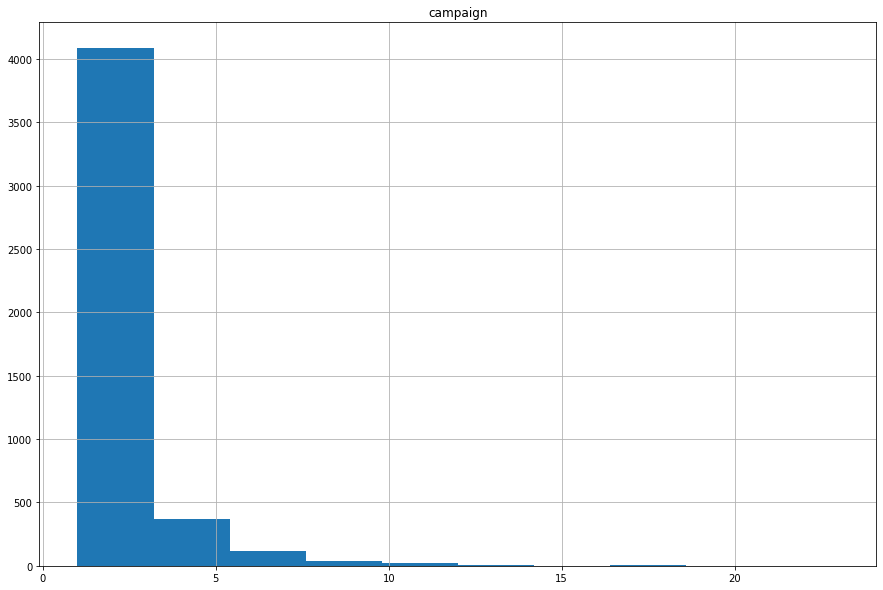

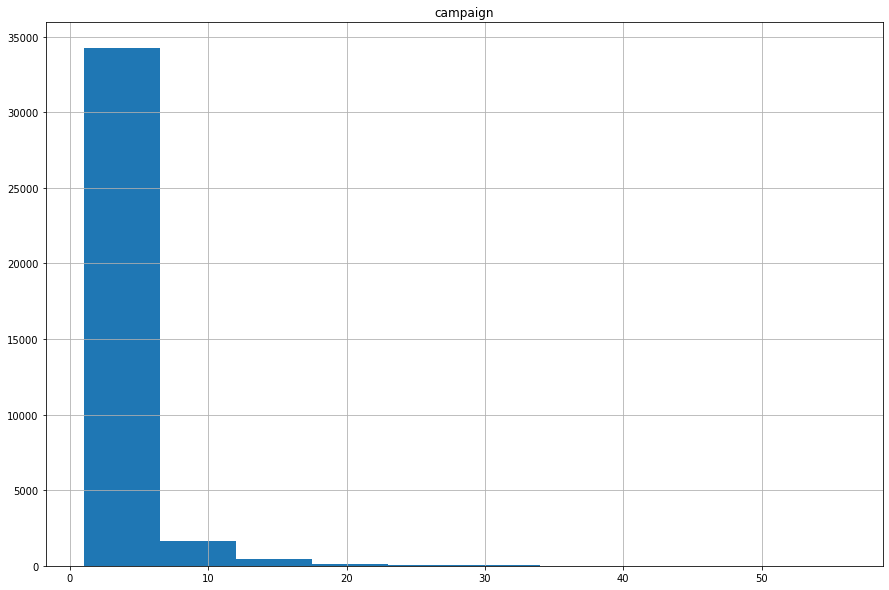

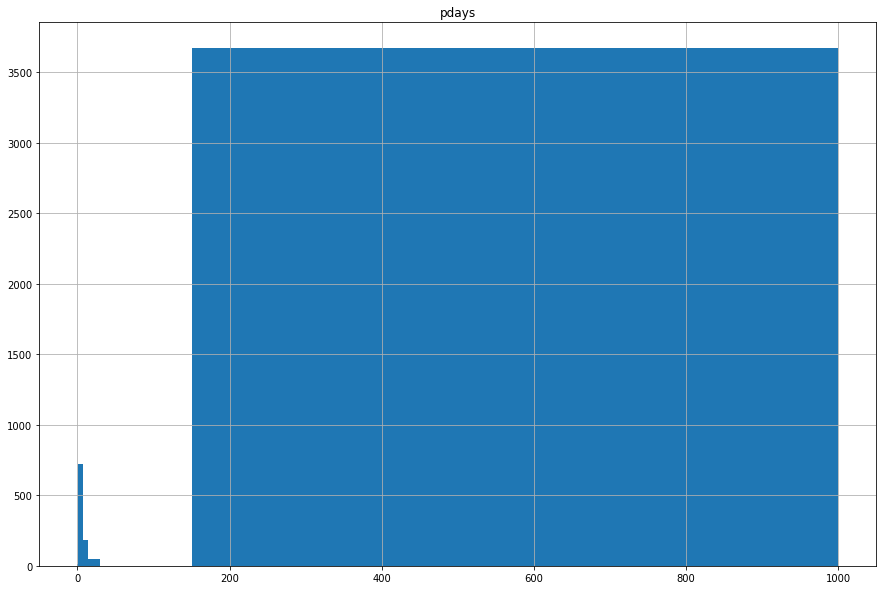

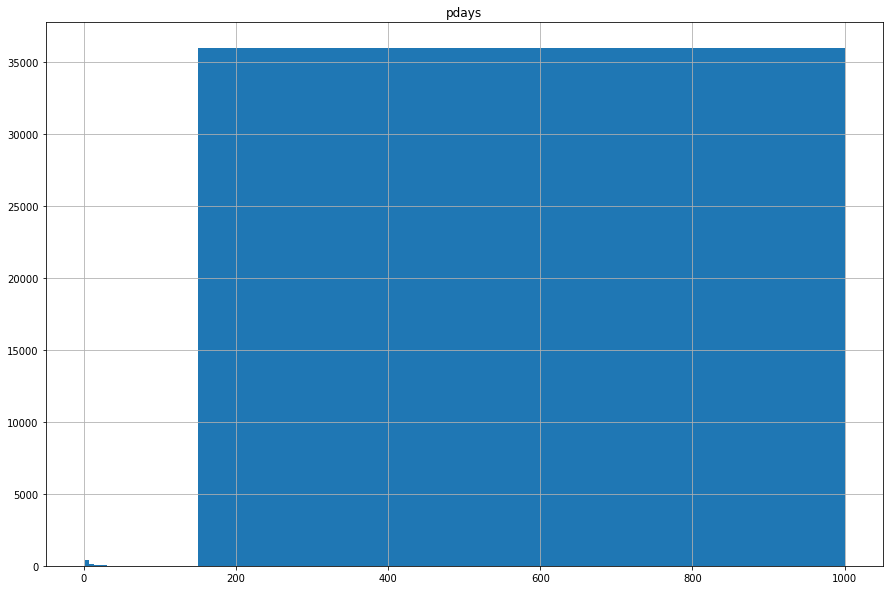

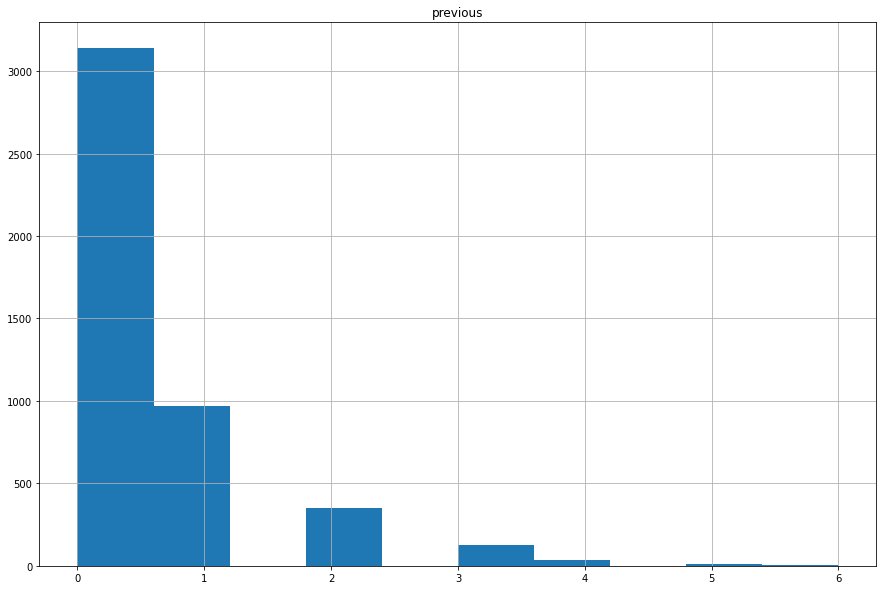

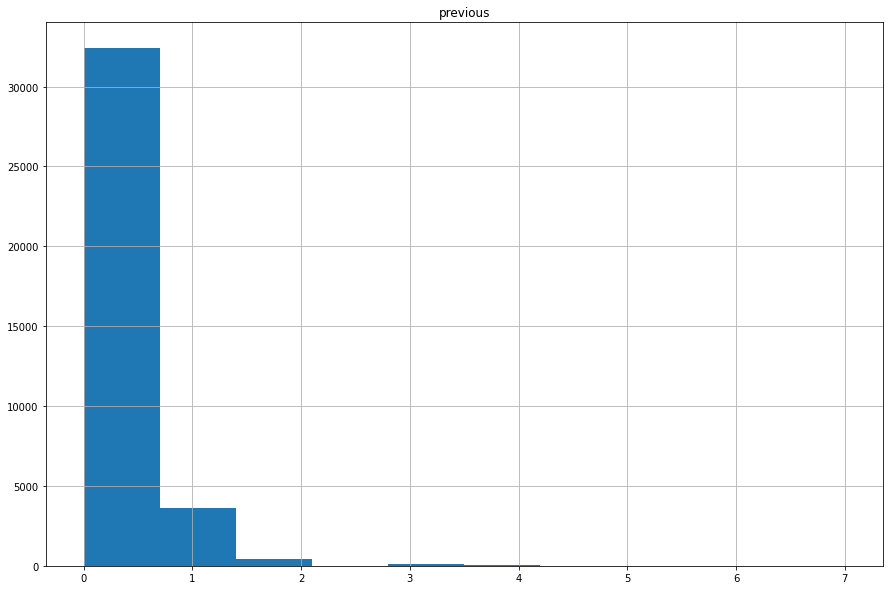

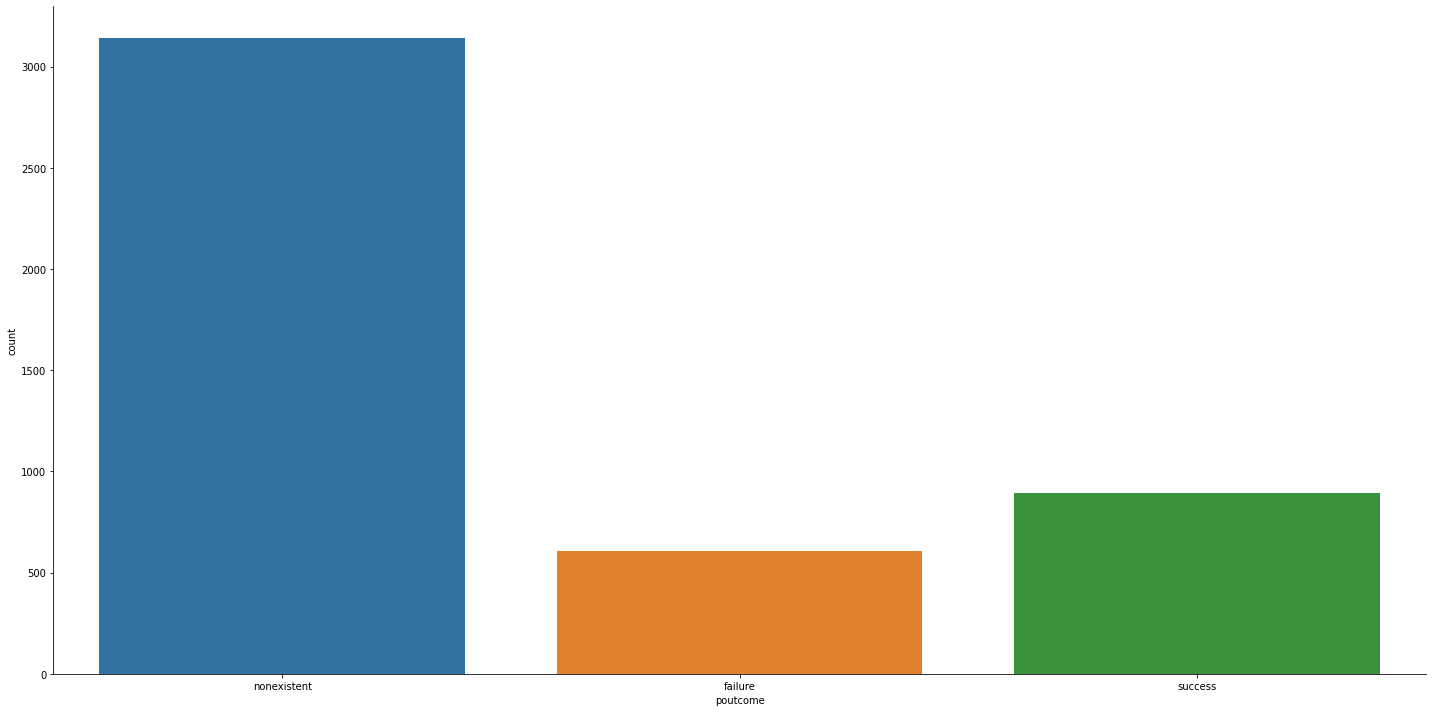

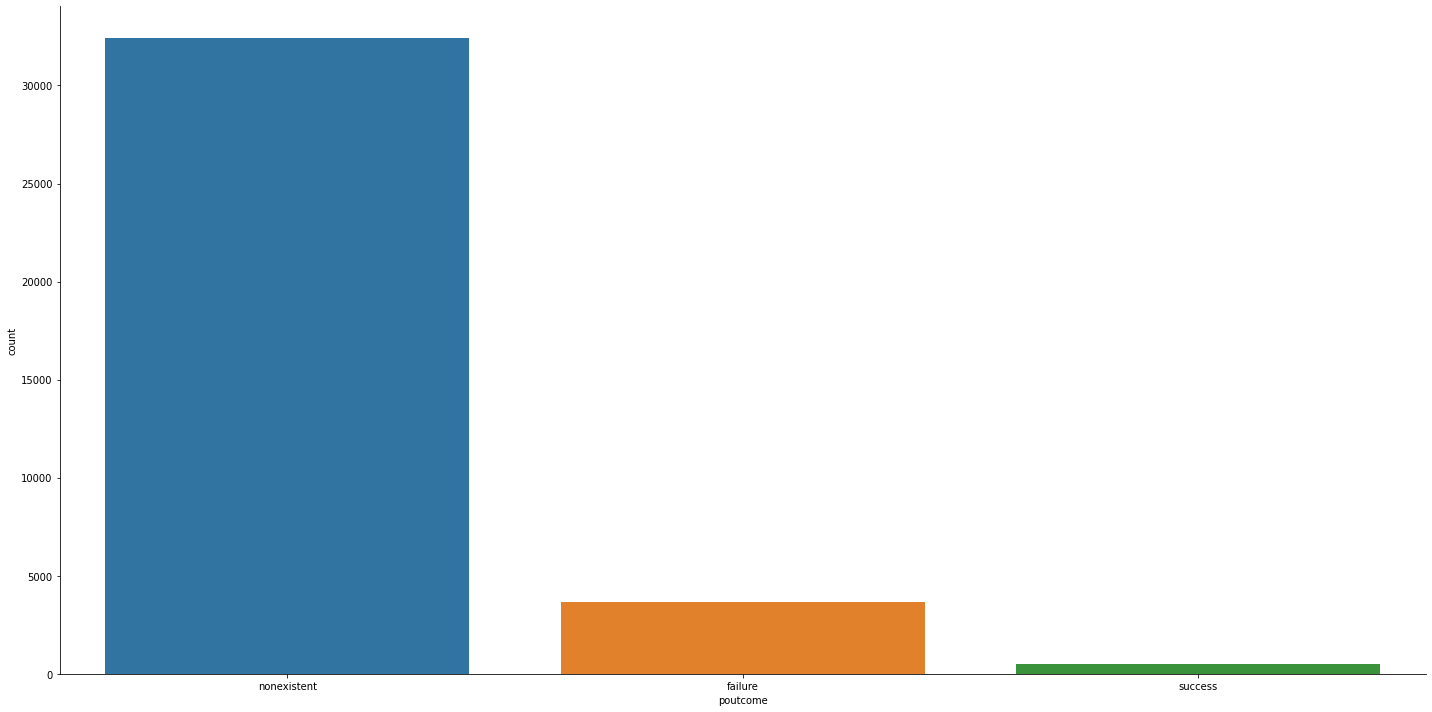

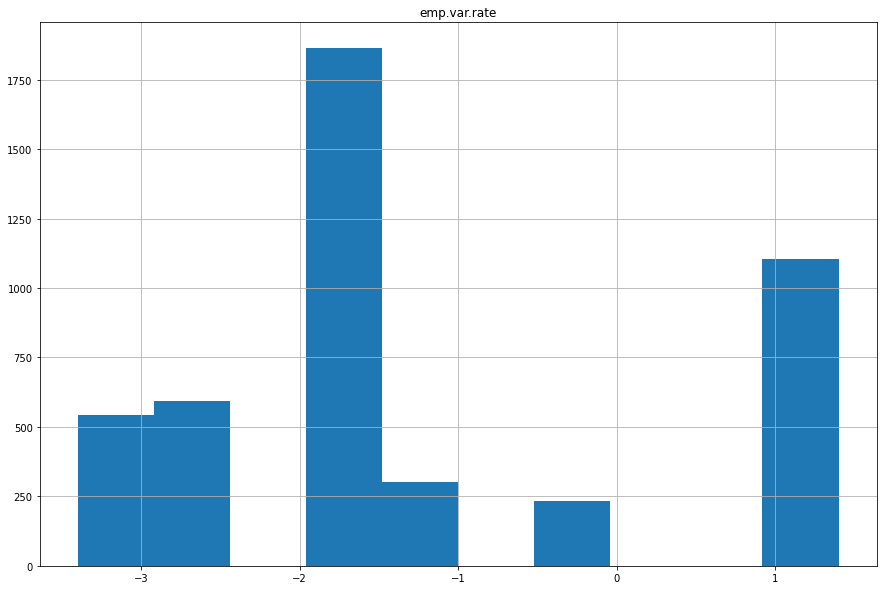

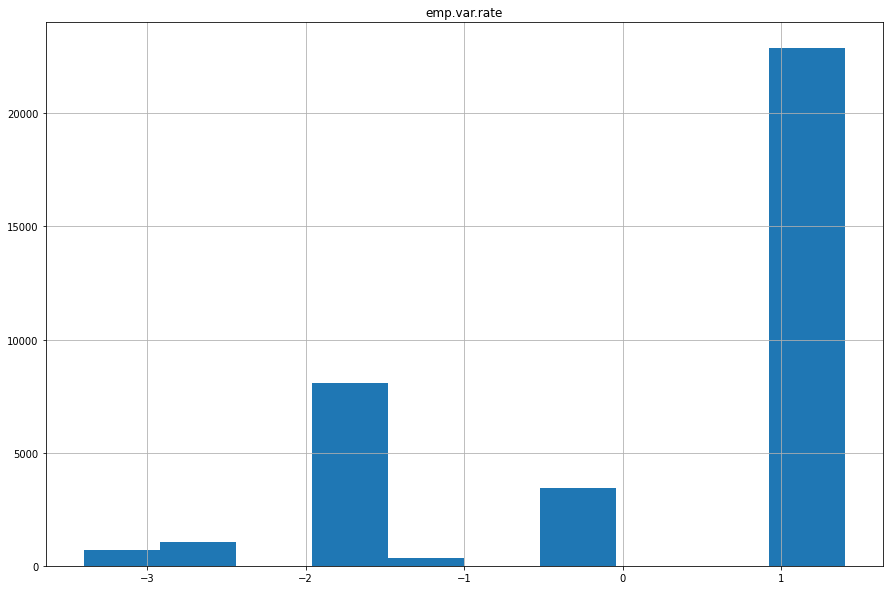

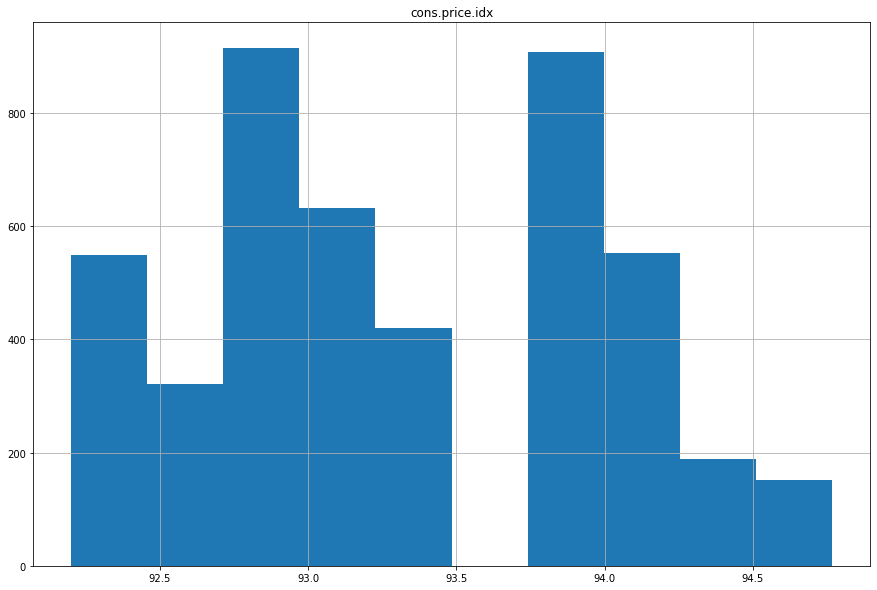

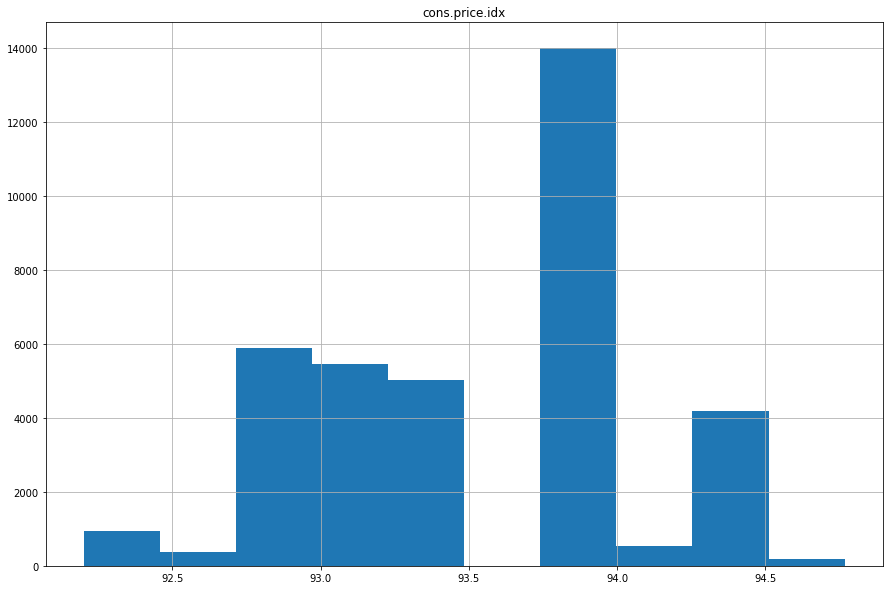

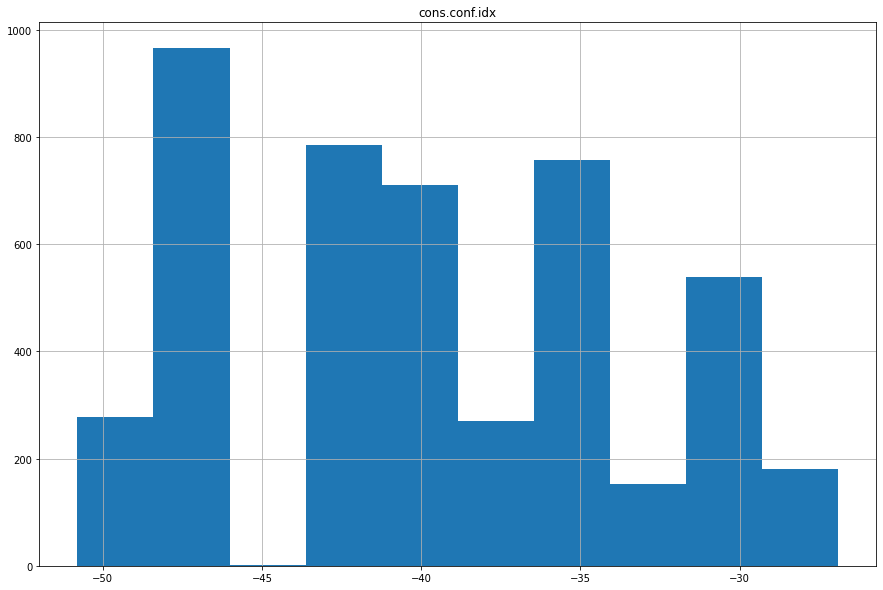

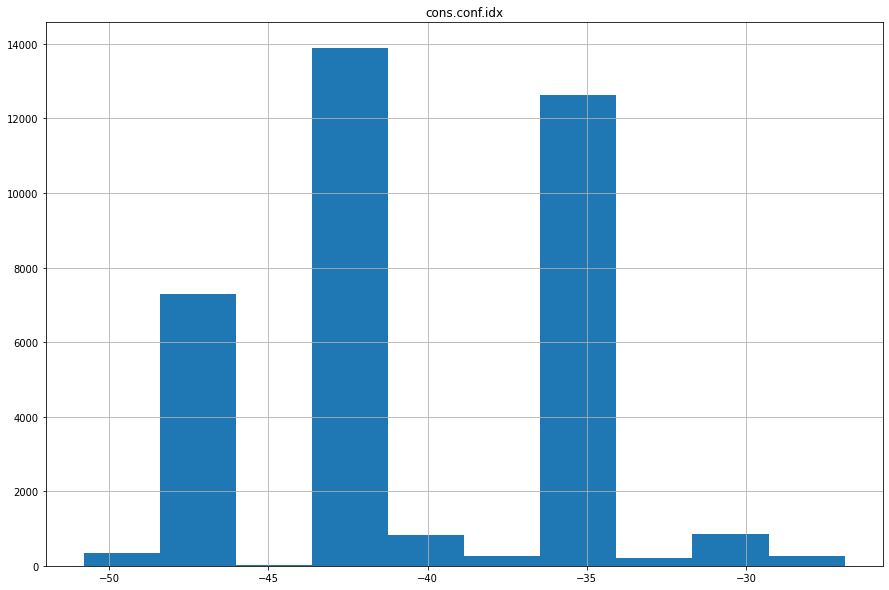

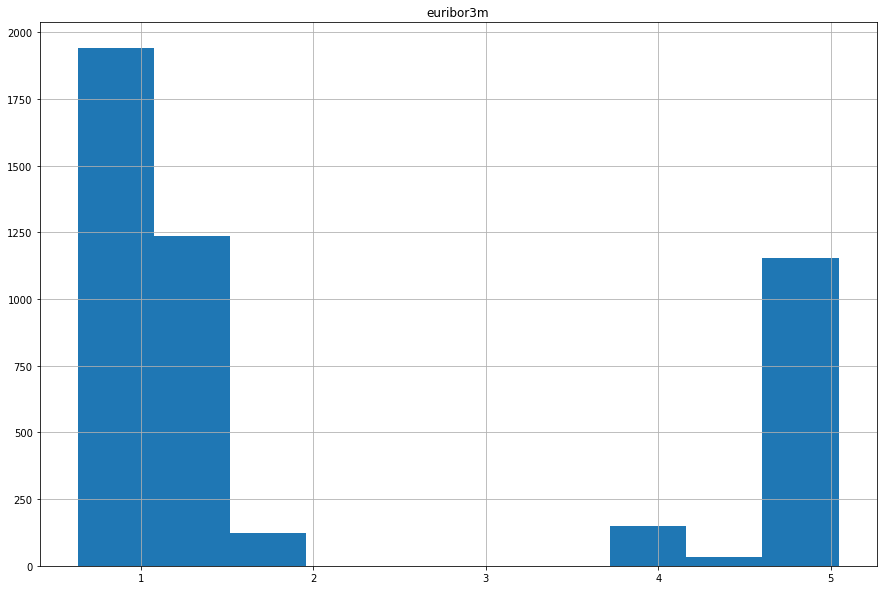

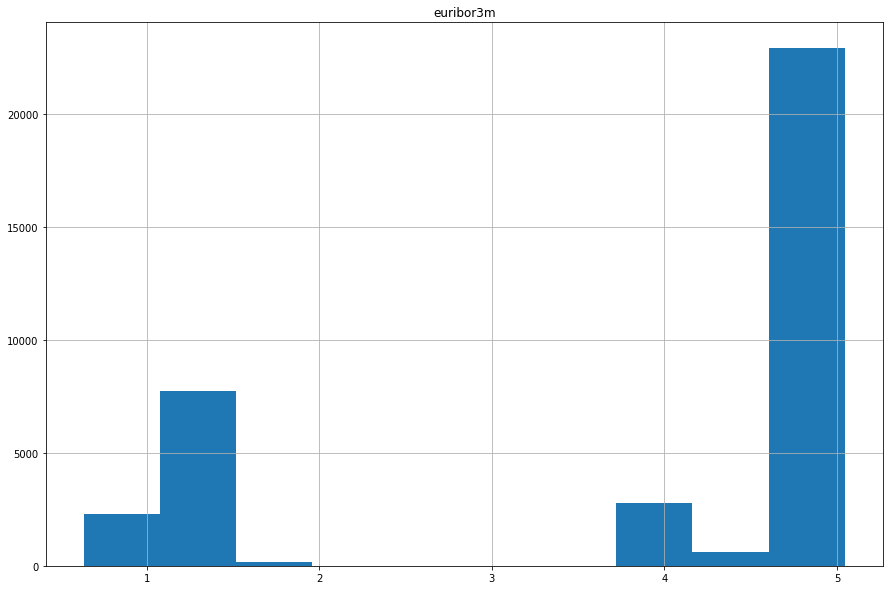

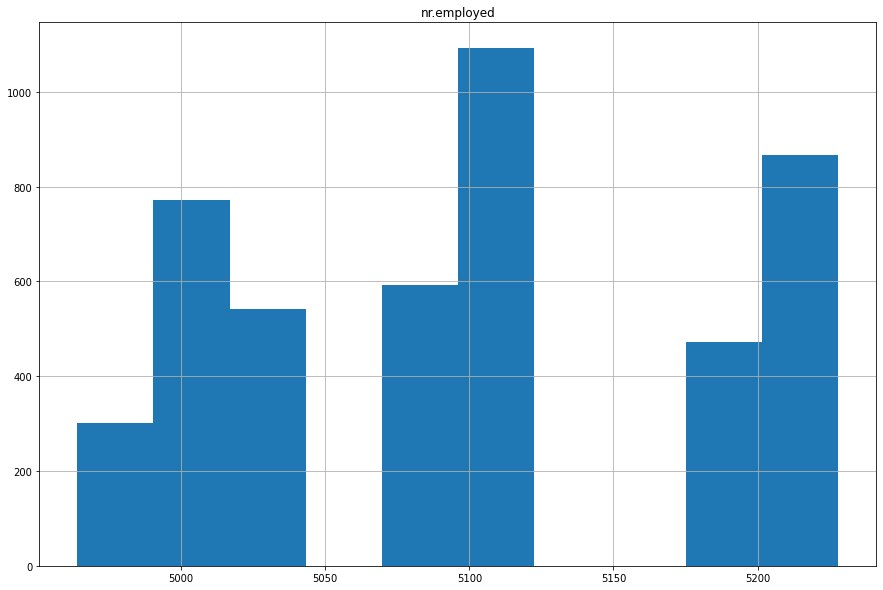

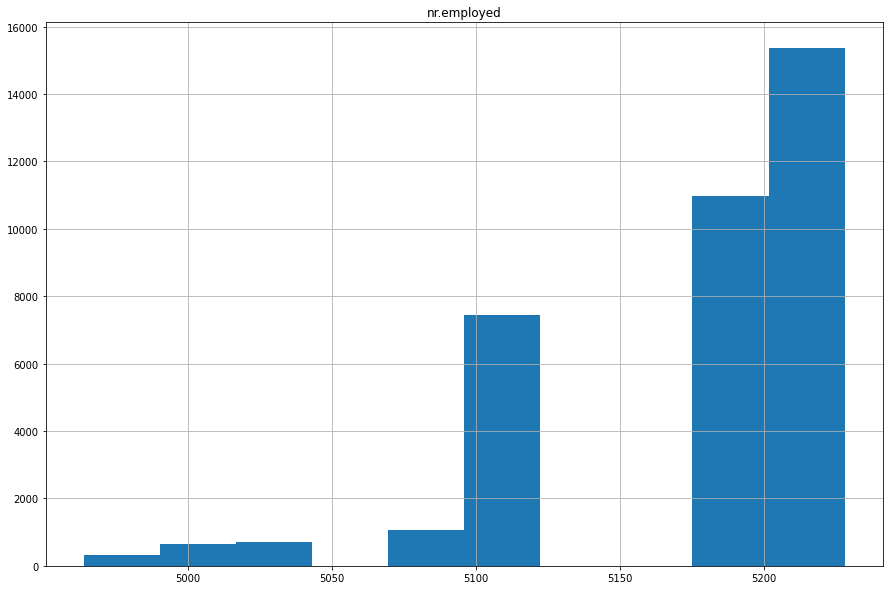

In [19]:
yesOrgData = originalSetWithoutDups.where(originalSetWithoutDups['y'] == 'yes')
noOrgData = originalSetWithoutDups.where(originalSetWithoutDups['y'] == 'no')

for column in originalSetWithoutDups.columns:
    if (column != 'y'):
        if (originalSetWithoutDups.dtypes[column].name.__eq__('object')):
            sb.catplot(x=column, kind='count', data=yesOrgData, height=10, aspect=2)
            sb.catplot(x=column, kind='count', data=noOrgData, height=10, aspect=2)
        else:
            if (column == 'pdays'):
                yesOrgData.hist(column=column, figsize=[15,10], bins=[0, 1, 7, 14, 30, 45, 60, 90, 150, 1000])
                noOrgData.hist(column=column, figsize=[15,10], bins=[0, 1, 7, 14, 30, 45, 60, 90, 150, 1000])
            else:
                yesOrgData.hist(column=column, figsize=[15,10], )
                noOrgData.hist(column=column, figsize=[15,10])
            

<AxesSubplot:>

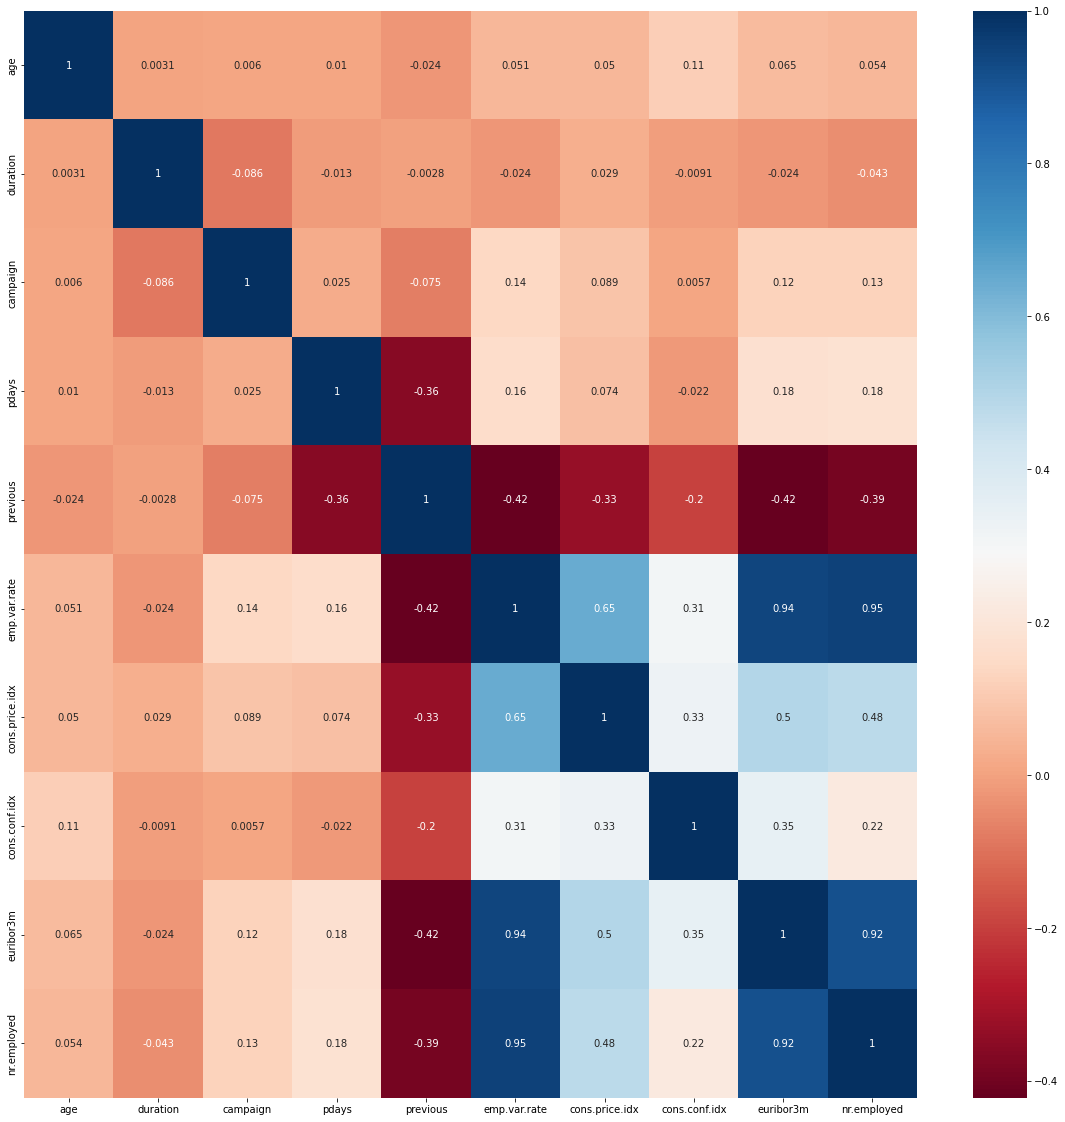

In [20]:
fig4, ax4 = plt.subplots(figsize = (20,20))
sb.heatmap(noOrgData.corr(method='spearman'), annot=True, cmap='RdBu', ax=ax4)

<AxesSubplot:>

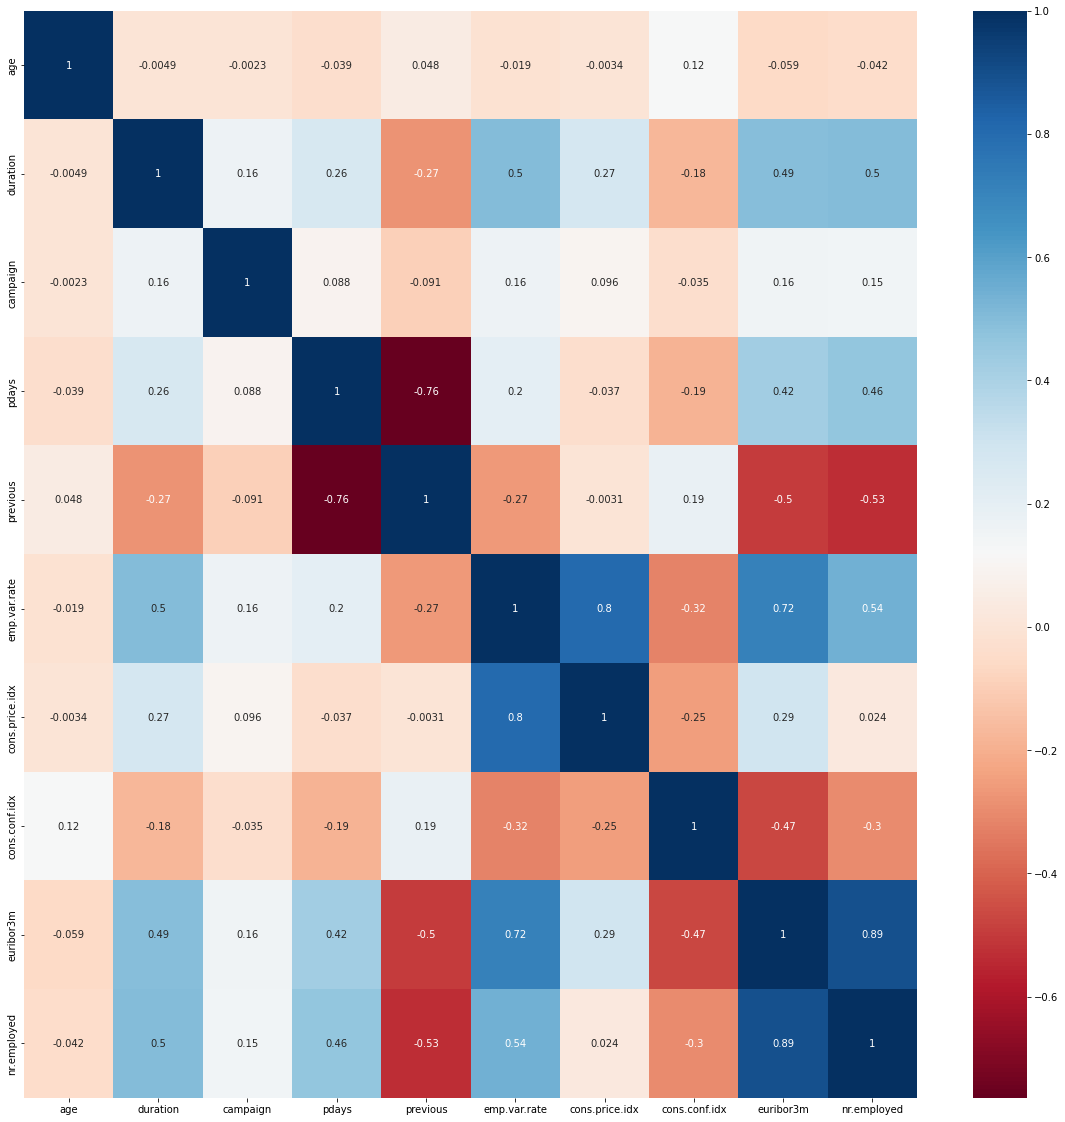

In [21]:
fig5, ax5 = plt.subplots(figsize = (20,20))
sb.heatmap(yesOrgData.corr(method='spearman'), annot=True, cmap='RdBu', ax=ax5)

# Prepare data

In [22]:
#meanImputer = Imputer(strategy='')
check = []
originalDataWithoutUnknown = originalSetWithoutDups.copy(deep=True)
for column in originalSetWithoutDups.columns:
    if (column != 'default' and originalSetWithoutDups.dtypes[column].name.__eq__('object')):
      valueForReplace = originalSetWithoutDups[column].mode()[0]
      originalDataWithoutUnknown[column] = originalSetWithoutDups[column].replace("unknown", valueForReplace)
      print(originalDataWithoutUnknown[column].value_counts())
      print('\n')

#colTrans = ColumnTransformer(
  #  ['num', ]
#)

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


married     25001
single      11564
divorced     4611
Name: marital, dtype: int64


university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64


yes    22561
no     18615
Name: housing, dtype: int64


no     34928
yes     6248
Name: loan, dtype: int64


cellular     26135
telephone    15041
Name: contact, dtype: int64


may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: d

In [23]:
trainDataOrg = originalDataWithoutUnknown.drop(columns=['duration'], axis='columns')
trainDataLogical = trainDataOrg.drop(columns=['default', 'euribor3m', 'nr.employed'], axis='columns')
# Normalize pdays
def normalizePdays(x):
    labelVal = 'Never'
    if (x == 999):
        labelVal = 'Never'
    elif(x <= 1):
        labelVal = 'Yesterday'
    elif(x <= 3):
        labelVal = 'Few days'
    elif(x <=7):
        labelVal = 'Week'
    elif(x <= 14):
        labelVal = 'Two weeks'
    elif(x <= 30):
        labelVal = 'Weeks'
    else:
        labelVal = 'Months'
    
    return labelVal

trainDataLogical['pdaysNorm'] = trainDataLogical['pdays'].map(normalizePdays)
trainDataLogical = trainDataLogical.drop(columns=['pdays'], axis='columns')
# Reordering columns: Y must be the last 
TDL_Columns = trainDataLogical.columns
TDL_reordered_columns = TDL_Columns[:-2].tolist() + [TDL_Columns[-1]] + [TDL_Columns[-2]]
trainDataLogical = trainDataLogical[TDL_reordered_columns]
trainDataLogical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   campaign        41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  pdaysNorm       41176 non-null  object 
 16  y               41176 non-null  object 
dtypes: float64(3), int64(3), object

# Models and cross-validation

## Prepare sets

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

def normalizeY(x):
    ret = -1
    if (x == 'yes'):
        ret = 1
    else:
        ret = 0
    return ret

# Original dataset
orgWithoutDupsFeatures.info()
orgWithoutDupsY = originalSetWithoutDups['y'].map(normalizeY)
orgWithoutDupsY.value_counts()

#categoricFeaturesList = list(originalSetWithoutDups.dtypes[originalSetWithoutDups.dtypes == object].index)
orgWithoutDupsCatFeaturesList = orgWithoutDupsFeatures.columns.get_indexer(list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes == object].index))
orgWithoutDupsNumFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes != object].index)
transformerOrgWithoutDups = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), orgWithoutDupsCatFeaturesList)#,
    #('num', StandardScaler(), orgWithoutDupsNumFeaturesList)
    ])

# Dataset with replaced 'unknwown' values
orgWithoutUnknownFeatures = originalDataWithoutUnknown.loc[:, originalDataWithoutUnknown.columns != 'y']
orgWithoutUnknownY = originalDataWithoutUnknown['y'].map(normalizeY)
orgWithoutUnknownFeatures.info()
orgWithoutUnknownY.value_counts()

orgWithoutUnknownFeaturesList = list(orgWithoutUnknownFeatures.dtypes[orgWithoutUnknownFeatures.dtypes == object].index)
pipelineWithoutUnknownDups = ColumnTransformer([
    ('catBin', OneHotEncoder(), orgWithoutUnknownFeaturesList)
    ])

# Dataset without 'duration' column - Real data
realDataFeatures = trainDataOrg.loc[:, trainDataOrg.columns != 'y']
realDataY = trainDataOrg['y'].map(normalizeY)
realDataFeatures.info()
realDataY.value_counts()

realDataFeaturesList = list(realDataFeatures.dtypes[realDataFeatures.dtypes == object].index)
pipelineRealData = ColumnTransformer([
    ('catBin', OneHotEncoder(), realDataFeaturesList)
    ])

# Dataset without high correlated features, normalized 'pdays' column - Logical data
logicalDataFeatures = trainDataLogical.loc[:, trainDataLogical.columns != 'y']
logicalDataY = trainDataLogical['y'].map(normalizeY)
logicalDataFeatures.info()
logicalDataY.value_counts()

oneHotFeatures_logicalSet = (list(logicalDataFeatures.dtypes[logicalDataFeatures.dtypes == object].index))
oneHotFeatures_logicalSet.remove('pdaysNorm')
logicalDataFeaturesList = logicalDataFeatures.columns.get_indexer(oneHotFeatures_logicalSet) # 15 - pdaysNorm
pipelineLogicalData = ColumnTransformer([
    ('catBin', OneHotEncoder(), logicalDataFeaturesList),
    ('catVal', OrdinalEncoder(), [15])
    ])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Evaluate models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

orgFeatures_train, orgFeatures_test, orgY_train, orgY_test = train_test_split(orgWithoutDupsFeatures, orgWithoutDupsY, test_size=0.30)
unknownFeatures_train, unknownFeatures_test, unknownY_train, unknownY_test = train_test_split(orgWithoutUnknownFeatures, orgWithoutUnknownY, test_size=0.30)
realFeatures_train, realFeatures_test, realY_train, realY_test = train_test_split(realDataFeatures, realDataY, test_size=0.30)
logicalFeatures_train, logicalFeatures_test, logicalY_train, logicalY_test = train_test_split(logicalDataFeatures, logicalDataY, test_size=0.30)

#svmModel = svm.OneClassSVM()
gNBModel = GaussianNB()
knModel = KNeighborsClassifier(n_neighbors=3)
dTreeModel = DecisionTreeClassifier()
rForestModel = RandomForestClassifier()

modelsOrg = []
modelsUnk = []
modelsReal = []
modelsLogical = []

modelsOrg.append(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'))
modelsOrg.append(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'))
modelsOrg.append(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-Tree: default'))
modelsOrg.append(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Forest: default'))

modelsUnk.append(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'))
modelsUnk.append(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'))
modelsUnk.append(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-Tree: default'))
modelsUnk.append(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Forest: default'))

modelsReal.append(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'))
modelsReal.append(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'))
modelsReal.append(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-Tree: default'))
modelsReal.append(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Forest: default'))

modelsLogical.append(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'))
modelsLogical.append(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'))
modelsLogical.append(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-Tree: default'))
modelsLogical.append(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Forest: default'))
#models.append(SimpleNamespace(model=svmModel, name= 'SVM: One Class'))

print(modelsOrg[0].model == modelsLogical[0].model)
print(modelsUnk[1].model == modelsReal[1].model)

False
False


In [4]:
def testModel(model, featureSet, resultSet, transformer, num_cores):
    """
    Parameters:
    model: Estimator for cross-validation
    featureSet (DataFrame): Set containing values of features, used as X set for cross-validation
    resultSet (Sequence): Set containing results, used as Y set for cross-validation
    transformer (ColumnTransformer): Used for normalizing values
    """
    print('-----------------------------' + model.name + '--------------------------------------')
    print('\n')

    #transform
    _feature_tranform = transformer.fit_transform(featureSet)
    _feature_array = _feature_tranform.toarray()
    #cross-validate
    _kf = KFold(n_splits=10, shuffle=False)
    _cv_Results = cross_validate(estimator=model.model, X=_feature_array, y=resultSet, scoring=['accuracy', 'precision', 'recall_macro', 'f1'], cv=_kf, n_jobs= num_cores)
    print(_cv_Results)

    print('\n')
    print('Confusion Matrix: \n')
    #confusion matrix
    _cv_prediction = cross_val_predict(estimator=model.model, X=_feature_array, y=resultSet, cv=_kf, n_jobs= num_cores)
    _conf_matrix = confusion_matrix(resultSet, _cv_prediction)
    print(_conf_matrix)

    print('-------------------------------------------------------------------------------------')
    


In [24]:
for m in modelsOrg:
    testModel(m, orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups, -1)

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.13471556, 0.12369943, 0.12869811, 0.13999343, 0.1759944 ,
       0.15369987, 0.15999699, 0.04900312, 0.14298797, 0.12802482]), 'score_time': array([0.04598284, 0.05799699, 0.04798532, 0.03899169, 0.03499103,
       0.05300903, 0.03801465, 0.01200032, 0.03299379, 0.03595614]), 'test_accuracy': array([0.93880525, 0.94123361, 0.37008256, 0.69645459, 0.67168528,
       0.4191355 , 0.13213505, 0.50230751, 0.67282001, 0.53947049]), 'test_precision': array([0.02739726, 0.04672897, 0.04166667, 0.06960352, 0.06923682,
       0.05612454, 0.10396786, 0.15847234, 0.19135802, 0.49937225]), 'test_recall_macro': array([0.49981159, 0.50440473, 0.49535159, 0.50736745, 0.51800757,
       0.5085287 , 0.51161048, 0.60163901, 0.5355645 , 0.56202758]), 'test_f1': array([0.03076923, 0.03968254, 0.07818053, 0.11221591, 0.11518325,
       0.10277569, 0.18813906, 0.26055576, 0.24368332, 0.626

In [67]:
testModel(SimpleNamespace(model=gNBModel, name= 'Gaussian Naive-Bayes: default'), logicalDataFeatures, logicalDataY, pipelineLogicalData, -1)

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.1764133 , 0.10485482, 0.09856224, 0.09754968, 0.10672021,
       0.14612532, 0.13448834, 0.2234118 , 0.11160541, 0.10072708]), 'score_time': array([0.06148291, 0.0276258 , 0.06356812, 0.02894211, 0.02775788,
       0.037431  , 0.03765535, 0.03965664, 0.01874924, 0.0235765 ]), 'test_accuracy': array([0.96308888, 0.9592035 , 0.90456532, 0.91549296, 0.91525012,
       0.92302088, 0.40466359, 0.67913529, 0.81467088, 0.59387904]), 'test_precision': array([0.06818182, 0.07407407, 0.041841  , 0.02531646, 0.08181818,
       0.26530612, 0.10923077, 0.21089385, 0.33236994, 0.54919499]), 'test_recall_macro': array([0.50803801, 0.50375031, 0.49970419, 0.49365   , 0.50443021,
       0.59706082, 0.52575991, 0.65038296, 0.55558641, 0.59800746]), 'test_f1': array([0.03797468, 0.02325581, 0.04842615, 0.01136364, 0.04904632,
       0.24703088, 0.18814177, 0.31376623, 0.23162135, 0.594

In [34]:
print('Without Unknown \n')
for m in modelsUnk:
    testModel(m, orgWithoutUnknownFeatures, orgWithoutUnknownY, pipelineWithoutUnknownDups, -1)

Without Unknown 

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.09759641, 0.11757755, 0.1255815 , 0.171592  , 0.18459082,
       0.20209265, 0.17309427, 0.18055701, 0.11932492, 0.12634897]), 'score_time': array([0.0529964 , 0.05402851, 0.03602338, 0.07800817, 0.06500626,
       0.03100419, 0.03899527, 0.03900146, 0.03199434, 0.02299094]), 'test_accuracy': array([0.94001943, 0.94293346, 0.36935406, 0.68406994, 0.61704711,
       0.40990772, 0.12824872, 0.50085013, 0.66601895, 0.54092786]), 'test_precision': array([0.02158273, 0.05      , 0.04196597, 0.07095159, 0.06806283,
       0.05740666, 0.10394803, 0.15775635, 0.18728522, 0.5003127 ]), 'test_recall_macro': array([0.49617488, 0.50528568, 0.49771805, 0.51094424, 0.51792645,
       0.51621086, 0.51156337, 0.59993496, 0.53215862, 0.56373186]), 'test_f1': array([0.02371542, 0.04081633, 0.07875133, 0.11556764, 0.11652661,
       0.10530191, 0.18819272, 0.25945946,

In [35]:
print('Real \n')
for m in modelsReal:
    testModel(m, realDataFeatures, realDataY, pipelineRealData, -1)

Real 

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.21300292, 0.14802003, 0.15101504, 0.14802003, 0.18600869,
       0.23701167, 0.15500975, 0.20202827, 0.1418612 , 0.13484859]), 'score_time': array([0.10900831, 0.03900027, 0.03999901, 0.0489912 , 0.07500076,
       0.05798268, 0.03800368, 0.07697964, 0.02991176, 0.02890849]), 'test_accuracy': array([0.94001943, 0.94293346, 0.36935406, 0.68406994, 0.61704711,
       0.40990772, 0.12824872, 0.50085013, 0.66601895, 0.54092786]), 'test_precision': array([0.02158273, 0.05      , 0.04196597, 0.07095159, 0.06806283,
       0.05740666, 0.10394803, 0.15775635, 0.18728522, 0.5003127 ]), 'test_recall_macro': array([0.49617488, 0.50528568, 0.49771805, 0.51094424, 0.51792645,
       0.51621086, 0.51156337, 0.59993496, 0.53215862, 0.56373186]), 'test_f1': array([0.02371542, 0.04081633, 0.07875133, 0.11556764, 0.11652661,
       0.10530191, 0.18819272, 0.25945946, 0.24075097

In [36]:
print('Logical \n')
for m in modelsLogical:
    testModel(m, logicalDataFeatures, logicalDataY, pipelineLogicalData, -1)


Logical 

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.09860396, 0.10958743, 0.20856452, 0.10058761, 0.11208844,
       0.11209941, 0.13709378, 0.09907722, 0.09488678, 0.08988428]), 'score_time': array([0.03895354, 0.06997037, 0.02400088, 0.02597833, 0.02497935,
       0.02305222, 0.09513593, 0.02207327, 0.02299786, 0.02298069]), 'test_accuracy': array([0.96308888, 0.9592035 , 0.90456532, 0.91549296, 0.91525012,
       0.92302088, 0.40466359, 0.67913529, 0.81467088, 0.59387904]), 'test_precision': array([0.06818182, 0.07407407, 0.041841  , 0.02531646, 0.08181818,
       0.26530612, 0.10923077, 0.21089385, 0.33236994, 0.54919499]), 'test_recall_macro': array([0.50803801, 0.50375031, 0.49970419, 0.49365   , 0.50443021,
       0.59706082, 0.52575991, 0.65038296, 0.55558641, 0.59800746]), 'test_f1': array([0.03797468, 0.02325581, 0.04842615, 0.01136364, 0.04904632,
       0.24703088, 0.18814177, 0.31376623, 0.23162

In [41]:
testModel(SimpleNamespace(model=ComplementNB(), name= 'Complement Naive-Bayes: default'), logicalDataFeatures, logicalDataY, pipelineLogicalData, -1)

-----------------------------Complement Naive-Bayes: default--------------------------------------


{'fit_time': array([0.05875635, 0.10375714, 0.05400944, 0.09376216, 0.07476115,
       0.05276251, 0.06077027, 0.11576819, 0.07799959, 0.06099486]), 'score_time': array([0.02300525, 0.03300929, 0.02799106, 0.08600378, 0.02400231,
       0.02699256, 0.05499554, 0.06199837, 0.01799464, 0.02100229]), 'test_accuracy': array([0.96624575, 0.96284604, 0.7246236 , 0.60174842, 0.53035454,
       0.25206411, 0.19091572, 0.5856206 , 0.74131649, 0.53169784]), 'test_precision': array([0.        , 0.1       , 0.04285714, 0.06822489, 0.0675606 ,
       0.05264807, 0.10627366, 0.17994723, 0.24940048, 0.49462366]), 'test_recall_macro': array([0.49687812, 0.50231563, 0.50190162, 0.50599466, 0.52072758,
       0.48507235, 0.52211058, 0.63143781, 0.57054016, 0.55740742]), 'test_f1': array([0.        , 0.01290323, 0.07352941, 0.11637931, 0.11930783,
       0.09836066, 0.19091572, 0.28559464, 0.28089129, 0.6

In [25]:
testModel(SimpleNamespace(model=ComplementNB(), name= 'Complement Naive-Bayes: default'), realDataFeatures, realDataY, pipelineRealData, -1)

-----------------------------Complement Naive-Bayes: default--------------------------------------


{'fit_time': array([0.08058143, 0.04703307, 0.06756639, 0.05105019, 0.07157207,
       0.04003882, 0.05103374, 0.0445931 , 0.05861282, 0.06513023]), 'score_time': array([0.04645443, 0.02853394, 0.01746321, 0.03802037, 0.02544928,
       0.01501155, 0.07699943, 0.01853681, 0.02312684, 0.01099825]), 'test_accuracy': array([0.96818844, 0.96284604, 0.69766877, 0.59689169, 0.5106848 ,
       0.29650316, 0.19115861, 0.5805198 , 0.70658246, 0.52003886]), 'test_precision': array([0.05263158, 0.        , 0.04580153, 0.06952204, 0.06699507,
       0.05167785, 0.1071525 , 0.18163055, 0.2371134 , 0.48799314]), 'test_recall_macro': array([0.50213821, 0.4989932 , 0.51255071, 0.51019973, 0.51931819,
       0.47926306, 0.52647822, 0.63817899, 0.57822671, 0.54863803]), 'test_f1': array([0.01503759, 0.        , 0.07982262, 0.11889597, 0.1189331 ,
       0.09609984, 0.19253152, 0.28959276, 0.29521587, 0.6

In [26]:
testModel(SimpleNamespace(model=ComplementNB(), name= 'Complement Naive-Bayes: default'), orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups, -1)

-----------------------------Complement Naive-Bayes: default--------------------------------------


{'fit_time': array([0.03856277, 0.0395565 , 0.03856277, 0.03856277, 0.03128934,
       0.04581261, 0.04380083, 0.0698247 , 0.04396844, 0.03896904]), 'score_time': array([0.03252554, 0.02953815, 0.02352333, 0.02452731, 0.05954576,
       0.01500201, 0.01801562, 0.05607009, 0.01500273, 0.01000834]), 'test_accuracy': array([0.9679456 , 0.96308888, 0.69742593, 0.59592035, 0.51165614,
       0.29698883, 0.19140151, 0.57906242, 0.70609667, 0.51931018]), 'test_precision': array([0.05      , 0.        , 0.04576271, 0.06934985, 0.06627102,
       0.05171256, 0.10718143, 0.18139774, 0.23666978, 0.48752509]), 'test_recall_macro': array([0.50201334, 0.49911905, 0.51242394, 0.50967957, 0.51620414,
       0.47951994, 0.52661343, 0.6382274 , 0.57793852, 0.54768701]), 'test_f1': array([0.01492537, 0.        , 0.07976366, 0.11864407, 0.11759544,
       0.09615985, 0.19257822, 0.28946289, 0.29487179, 0.6

In [23]:
testModel(SimpleNamespace(model=CategoricalNB(), name= 'Categorical Naive-Bayes: default'), orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups, -1)

-----------------------------Categorical Naive-Bayes: default--------------------------------------


{'fit_time': array([0.30533934, 0.33333969, 0.34434795, 0.28436184, 0.32434154,
       0.2893343 , 0.30533385, 0.29897857, 0.22798204, 0.23597193]), 'score_time': array([0.05102777, 0.0450263 , 0.04699588, 0.04198027, 0.04101682,
       0.05401587, 0.03699541, 0.02298522, 0.01500845, 0.00800538]), 'test_accuracy': array([0.97231666, 0.96478873, 0.95774648, 0.92593492, 0.93491986,
       0.82078679, 0.67622055, 0.78479475, 0.80665533,        nan]), 'test_precision': array([0.        , 0.        , 0.        , 0.        , 0.07692308,
       0.0411449 , 0.16544656, 0.21726619, 0.29589041,        nan]), 'test_recall_macro': array([0.5       , 0.5       , 0.5       , 0.49583875, 0.50039152,
       0.4822696 , 0.61555237, 0.57808883, 0.54643043,        nan]), 'test_f1': array([0.        , 0.        , 0.        , 0.        , 0.00740741,
       0.05867347, 0.25322129, 0.25420875, 0.21343874,   

# Balancing Data

## Function for Balancing data
build_and_test function can be found on this link: [Balancing Notebook](https://github.com/alod83/data-science/blob/master/Preprocessing/Balancing/Balancing.ipynb)

In [3]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.toarray())
    X_pca = pca.transform(X_tr.toarray())
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = GaussianNB(class_weight=class_weight)
    else:
        model = GaussianNB()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

In [2]:
def resampleDataset(resampler, featureSet, resultSet, transformer):
    """
    Parameters:
    resampler: Object used for resampling from imblearn
    featureSet (DataFrame): Set containing values of features, used as X set
    resultSet (Sequence): Set containing results, used as Y set
    transformer (ColumnTransformer): Used for normalizing values
    """

    #transform
    _feature_tranform = transformer.fit_transform(featureSet)
    _feature_array = _feature_tranform.toarray()
    #resample
    features_resampled, y_resampled = resampler.fit_resample(_feature_array, resultSet)
    return features_resampled, y_resampled

In [ ]:
cc = ClusterCentroids(random_state=42)
org_UndersampleFeatures, org_UndersampleY = resampleDataset(cc, orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups)

In [27]:
smoten = SMOTEN()
org_OversampleFeatures, org_OversampleY = resampleDataset(smoten, orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups)


In [37]:
smoteenn = SMOTEENN()
org_CombinedsampleFeatures, org_CombinedsampleY = resampleDataset(smoteenn, orgWithoutDupsFeatures, orgWithoutDupsY, transformerOrgWithoutDups)

## Test models with resampled data

In [1]:
def testTransformedModel(model, featureSet, resultSet, num_cores):
    """
    Parameters:
    model: Estimator for cross-validation
    featureSet (DataFrame): Set containing values of features, used as X set for cross-validation
    resultSet (Sequence): Set containing results, used as Y set for cross-validation
    transformer (ColumnTransformer): Used for normalizing values
    """
    print('-----------------------------' + model.name + '--------------------------------------')
    print('\n')

    #cross-validate
    _kf = KFold(n_splits=10, shuffle=False)
    _cv_Results = cross_validate(estimator=model.model, X=featureSet, y=resultSet, scoring=['accuracy', 'precision', 'recall_macro', 'f1'], cv=_kf, n_jobs= num_cores)
    print(_cv_Results)

    print('\n')
    print('Confusion Matrix: \n')
    #confusion matrix
    _cv_prediction = cross_val_predict(estimator=model.model, X=featureSet, y=resultSet, cv=_kf, n_jobs= num_cores)
    _conf_matrix = confusion_matrix(resultSet, _cv_prediction)
    print(_conf_matrix)

    print('-------------------------------------------------------------------------------------')

In [30]:
testTransformedModel(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'), org_OversampleFeatures, org_OversampleY, -1)

-----------------------------Complement Naive-Bayes: default--------------------------------------


{'fit_time': array([0.18208122, 0.17507124, 0.26756382, 0.26156569, 0.27105474,
       0.24319339, 0.17151618, 0.21292686, 0.27626753, 0.25105882]), 'score_time': array([0.05761528, 0.04507089, 0.06458831, 0.05450344, 0.04387927,
       0.06409955, 0.05406237, 0.0607934 , 0.05589342, 0.06931329]), 'test_accuracy': array([0.48221128, 0.30582923, 0.35851122, 0.22112753, 0.35418092,
       0.57876009, 0.92472971, 0.92418229, 0.92705625, 0.91829752]), 'test_precision': array([0.03077328, 0.05      , 0.06117793, 0.08818285, 0.13007183,
       0.66975994, 1.        , 1.        , 1.        , 1.        ]), 'test_recall_macro': array([0.51103356, 0.5088688 , 0.49312341, 0.52520769, 0.5188099 ,
       0.52718156, 0.46236486, 0.46209115, 0.46352812, 0.45914876]), 'test_f1': array([0.05823793, 0.09362158, 0.11178477, 0.16047198, 0.22115861,
       0.68326816, 0.96089306, 0.96059744, 0.96214757, 0.9

### Test Oversampled data

In [33]:
testTransformedModel(SimpleNamespace(model=GaussianNB(), name= 'K Naive-Bayes: default'), org_OversampleFeatures, org_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'), org_OversampleFeatures, org_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=DecisionTreeClassifier(), name= 'Complement Naive-Bayes: default'), org_OversampleFeatures, org_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=RandomForestClassifier(), name= 'Complement Naive-Bayes: default'), org_OversampleFeatures, org_OversampleY, -1)

-----------------------------K Naive-Bayes: default--------------------------------------


{'fit_time': array([0.19509292, 0.43313527, 0.344733  , 0.38174534, 0.36478877,
       0.2011044 , 0.18307924, 0.32373762, 0.29680753, 0.21210766]), 'score_time': array([0.04337049, 0.0490551 , 0.08938479, 0.04091883, 0.04194665,
       0.05964303, 0.05037832, 0.0479939 , 0.02926087, 0.0546    ]), 'test_accuracy': array([0.48221128, 0.30582923, 0.35851122, 0.22112753, 0.35418092,
       0.57876009, 0.92472971, 0.92418229, 0.92705625, 0.91829752]), 'test_precision': array([0.03077328, 0.05      , 0.06117793, 0.08818285, 0.13007183,
       0.66975994, 1.        , 1.        , 1.        , 1.        ]), 'test_recall_macro': array([0.51103356, 0.5088688 , 0.49312341, 0.52520769, 0.5188099 ,
       0.52718156, 0.46236486, 0.46209115, 0.46352812, 0.45914876]), 'test_f1': array([0.05823793, 0.09362158, 0.11178477, 0.16047198, 0.22115861,
       0.68326816, 0.96089306, 0.96059744, 0.96214757, 0.95740886])

In [ ]:
cc = ClusterCentroids(random_state=42)
logical_UndersampleFeatures, logical_UndersampleY = resampleDataset(cc, logicalDataFeatures, logicalDataY, pipelineLogicalData)

In [35]:
smoten = SMOTEN()
logical_OversampleFeatures, logical_OversampleY = resampleDataset(smoten, logicalDataFeatures, logicalDataY, pipelineLogicalData)

In [29]:
smoteenn = SMOTEENN()
logical_CombinedsampleFeatures, logical_CombinedsampleY = resampleDataset(smoteenn, logicalDataFeatures, logicalDataY, pipelineLogicalData)

In [36]:
testTransformedModel(SimpleNamespace(model=GaussianNB(), name= 'K Naive-Bayes: default'), logical_OversampleFeatures, logical_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'), logical_OversampleFeatures, logical_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=DecisionTreeClassifier(), name= 'Complement Naive-Bayes: default'), logical_OversampleFeatures, logical_OversampleY, -1)
testTransformedModel(SimpleNamespace(model=RandomForestClassifier(), name= 'Complement Naive-Bayes: default'), logical_OversampleFeatures, logical_OversampleY, -1)

-----------------------------K Naive-Bayes: default--------------------------------------


{'fit_time': array([0.22708559, 0.24001098, 0.35302806, 0.33534884, 0.40406346,
       0.33637691, 0.215271  , 0.20389223, 0.17315865, 0.18827271]), 'score_time': array([0.05340147, 0.0560565 , 0.06845093, 0.07271123, 0.06498671,
       0.05764031, 0.06067657, 0.06569982, 0.03534698, 0.03298926]), 'test_accuracy': array([0.94157088, 0.5270936 , 0.67227696, 0.37068966, 0.64622964,
       0.50992199, 0.53414534, 0.54345148, 0.53140824, 0.52128096]), 'test_precision': array([0.03524229, 0.04332449, 0.06151063, 0.09700889, 0.15733551,
       0.65937331, 1.        , 1.        , 1.        , 1.        ]), 'test_recall_macro': array([0.50307859, 0.47239077, 0.49770716, 0.55921649, 0.55088548,
       0.50871035, 0.26707267, 0.27172574, 0.26570412, 0.26064048]), 'test_f1': array([0.03611738, 0.0784    , 0.10198725, 0.17269293, 0.2295082 ,
       0.576864  , 0.69634255, 0.70420287, 0.69401251, 0.68531846])

### Test Combined data

In [ ]:
testTransformedModel(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'), org_CombinedsampleFeatures, org_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'), org_CombinedsampleFeatures, org_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-tree: default'), org_CombinedsampleFeatures, org_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Fores: default'), org_CombinedsampleFeatures, org_CombinedsampleY, -1)

In [40]:
testTransformedModel(SimpleNamespace(model=GaussianNB(), name= 'Gaussian Naive-Bayes: default'), logical_CombinedsampleFeatures, logical_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=KNeighborsClassifier(n_neighbors=3), name= 'KN: 3-neighbours'), logical_CombinedsampleFeatures, logical_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=DecisionTreeClassifier(), name= 'D-tree: default'), logical_CombinedsampleFeatures, logical_CombinedsampleY, -1)
testTransformedModel(SimpleNamespace(model=RandomForestClassifier(), name= 'Random Fores: default'), logical_CombinedsampleFeatures, logical_CombinedsampleY, -1)

-----------------------------Gaussian Naive-Bayes: default--------------------------------------


{'fit_time': array([0.21227312, 0.19102168, 0.13599634, 0.11201549, 0.25426936,
       0.12103033, 0.11102438, 0.17300701, 0.14007282, 0.1147697 ]), 'score_time': array([0.045012  , 0.04625654, 0.04200983, 0.0380044 , 0.03801417,
       0.04199243, 0.04197669, 0.03827667, 0.01997972, 0.029001  ]), 'test_accuracy': array([0.97188581, 0.35683391, 0.95415225, 0.39943772, 0.74221453,
       0.65722318, 0.54952422, 0.55959334, 0.54531689, 0.56651525]), 'test_precision': array([0.        , 0.        , 0.        , 0.        , 0.31459566,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_recall_macro': array([0.48594291, 0.17841696, 0.47707612, 0.19971886, 0.60421043,
       0.32861159, 0.27476211, 0.27979667, 0.27265845, 0.28325762]), 'test_f1': array([0.        , 0.        , 0.        , 0.        , 0.34863388,
       0.79316195, 0.70928123, 0.71761442, 0.70576708, 0.723

## Test KNN
Split Dataset, balance data, create model, and test with old data

In [52]:
def testTransformedModel(model, featureSet, resultSet, num_cores, testFeatureSet, testResultSet):
    """
    Parameters:
    model: Estimator for cross-validation
    featureSet (DataFrame): Set containing values of features, used as X set for cross-validation
    resultSet (Sequence): Set containing results, used as Y set for cross-validation
    transformer (ColumnTransformer): Used for normalizing values
    testFeatureSet (DataFrame): Set containing values of features for test set, used as X for final test
    testResultSet (Sequence): Set containing results for test set, used as Y set for final test
    """
    print('-----------------------------' + model.name + '--------------------------------------')
    print('\n')

    #cross-validate
    _kf = KFold(n_splits=10, shuffle=False)
    _cv_Results = cross_validate(estimator=model.model, X=featureSet, y=resultSet, scoring=['accuracy', 'precision', 'recall_macro', 'f1'], cv=_kf, n_jobs= num_cores)
    print(_cv_Results)

    print('\n')
    print('Confusion Matrix: \n')
    #confusion matrix
    _cv_prediction = cross_val_predict(estimator=model.model, X=featureSet, y=resultSet, cv=_kf, n_jobs= num_cores)
    _conf_matrix = confusion_matrix(resultSet, _cv_prediction)
    print(_conf_matrix)

    print('\n')
    print('Real Data Confusion Matrix: \n')
    _testmodel_prediction = cross_val_predict(estimator=model.model, X=testFeatureSet, y=testResultSet, cv=_kf, n_jobs= num_cores)
    _test_conf_matrix = confusion_matrix(testResultSet, _testmodel_prediction)
    print(_test_conf_matrix)

    print('-------------------------------------------------------------------------------------')

In [53]:
logical_TestResampling = logicalFeatures_train.copy(deep=True)
smoteenn_test = SMOTEENN()
logical_Test_CombinedsampleFeatures, logical_Test_CombinedsampleY = resampleDataset(smoteenn_test, logical_TestResampling, logicalY_train, pipelineLogicalData)

# Feature selection

In [26]:
logicalDataFeatures.info()
trainDataLogical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   campaign        41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  pdaysNorm       41176 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 6.3+ MB
<class 'pandas.cor

In [ ]:
featureSelector = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=7, cv=10)
featureSelector.fit(logical_CombinedsampleFeatures, logical_CombinedsampleY)
featureSelector.get_support()

In [41]:
def selectFeatures(model, featureSet, resultSet, transformer):


    #transform
    _feature_tranform = transformer.fit_transform(featureSet)
    _feature_array = _feature_tranform.toarray()
    
    _featureSelector = SequentialFeatureSelector(model, n_features_to_select=7, cv=10)
    _featureSelector.fit(_feature_array, resultSet)
    print(_featureSelector.get_support())
    return _featureSelector

def selectTransformedFeatures(model, featureSet, resultSet):
    _feature_array = featureSet.to_numpy()
    _featureSelector = SequentialFeatureSelector(model, n_features_to_select=7, cv=10)
    _featureSelector.fit(_feature_array, resultSet)
    print(_featureSelector.get_support())
    return _featureSelector

In [ ]:
_feature_tranform = pipelineLogicalData.fit_transform(logicalDataFeatures)
_feature_array = _feature_tranform.toarray()
for a in _feature_array:
    print(len(a))

In [39]:
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(pipelineLogicalData.fit_transform(logicalDataFeatures).toarray(), logicalDataY)
# Show results
print("Reduced number of features:", features_kbest.shape[1])
features_kbest

Reduced number of features: 5


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [34]:
featurSelctorResult = selectFeatures(GaussianNB(), logicalDataFeatures, logicalDataY, pipelineLogicalData)

[ True  True  True  True  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True]


Previous examples used OneHotEncoding (reason for too many columns).

In [44]:
#labelFeatures_logicalSet = (list(logicalDataFeatures.dtypes[logicalDataFeatures.dtypes == object].index))
#transformFeatureSelectionData = ColumnTransformer([
#    ('cat', OneHotEncoder(), logicalDataFeaturesList)
#    ])
labelEnc = LabelEncoder()
featureSelectionLogicalSet = logicalDataFeatures.copy(deep=True)
for column in featureSelectionLogicalSet.columns:
    featureSelectionLogicalSet[column] = labelEnc.fit_transform(featureSelectionLogicalSet[column])


selectedLogicalFeaturesArray = selectTransformedFeatures(GaussianNB(), featureSelectionLogicalSet, logicalDataY)
selectedLogicalFeaturesArray.get_feature_names_out(logicalDataFeatures.columns)

#ind = 0
#for item in selectedLogicalFeaturesArray:
#    if (item):
#        print(logicalDataFeatures.columns[ind] + '\n')

[False  True  True  True  True  True  True False False False False False
 False False False  True]


array(['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'pdaysNorm'], dtype=object)

In [45]:
selectedLogicalFeaturesArray = selectTransformedFeatures(RandomForestClassifier(), featureSelectionLogicalSet, logicalDataY)
selectedLogicalFeaturesArray.get_feature_names_out(logicalDataFeatures.columns)

[False False  True False  True  True  True False False  True False  True
 False False False  True]


array(['marital', 'housing', 'loan', 'contact', 'campaign', 'poutcome',
       'pdaysNorm'], dtype=object)

In [51]:
selectedLogicalFeaturesArray = selectTransformedFeatures(KNeighborsClassifier(), featureSelectionLogicalSet, logicalDataY)
selectedLogicalFeaturesArray.get_feature_names_out(logicalDataFeatures.columns)

[False  True False  True  True  True False False False  True False  True
 False False False  True]


array(['job', 'education', 'housing', 'loan', 'campaign', 'poutcome',
       'pdaysNorm'], dtype=object)